## Data Visualization

### Univariate Exploration of Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

!matplotlib inline

Matplotlib is building the font cache; this may take a moment.
Traceback (most recent call last):
  File "C:\Users\heloi\anaconda3\Scripts\matplotlib-script.py", line 10, in <module>
    sys.exit(plotting._matplotlib())
AttributeError: module 'pandas.plotting' has no attribute '_matplotlib'


In [2]:
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head(5)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


#### Bar Chart

A bar chart depicts the distribution of a categorical variable. In a bar chart, each level of the categorical variable is depicted with a bar, whose height indicates the frequency of data points that take on that level.

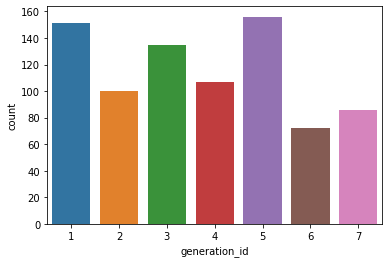

In [4]:
sb.countplot(data = pokemon, x = 'generation_id');

In [8]:
base_color = sb.color_palette()[1]

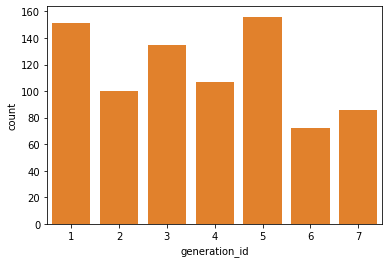

In [9]:
sb.countplot(data = pokemon, x = 'generation_id', color = base_color);

In [12]:
order_param = [5,1,3,4,2,7,6]

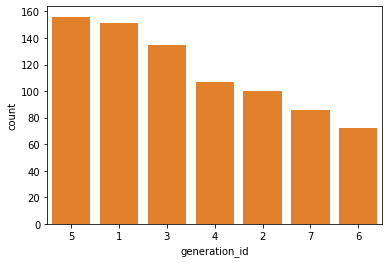

In [13]:
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, order = order_param);

In [14]:
pokemon['generation_id'].value_counts()

5    156
1    151
3    135
4    107
2    100
7     86
6     72
Name: generation_id, dtype: int64

In [18]:
order_sort = pokemon['generation_id'].value_counts().index.values

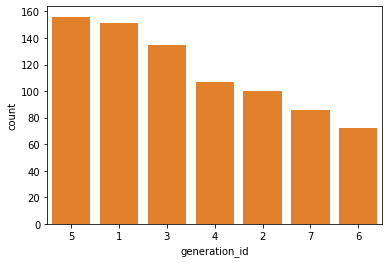

In [19]:
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, order = order_sort);

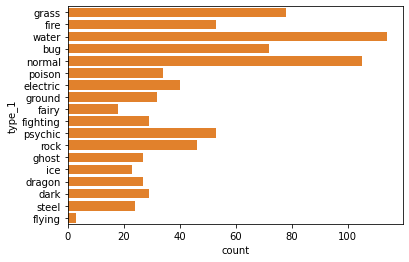

In [22]:
sb.countplot(data = pokemon, y = 'type_1', color = base_color);

In [27]:
type_order = pokemon['type_1'].value_counts().index

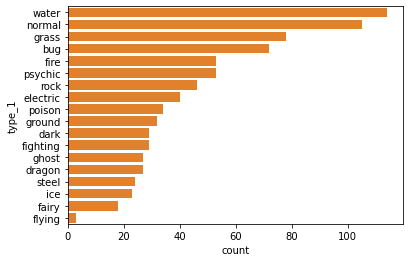

In [26]:
sb.countplot(data = pokemon, y = 'type_1', color = base_color, order = type_order);

In [31]:
pkmn_types = pokemon.melt(id_vars = ['id', 'species'],
                          value_vars = ['type_1','type_2'], 
                          var_name = 'type_level', value_name = 'type').dropna()

pkmn_types

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire
...,...,...,...,...
1607,801,magearna,type_2,fairy
1608,802,marshadow,type_2,ghost
1610,804,naganadel,type_2,dragon
1611,805,stakataka,type_2,steel


In [32]:
type_counts = pkmn_types['type'].value_counts()
type_order = type_counts.index

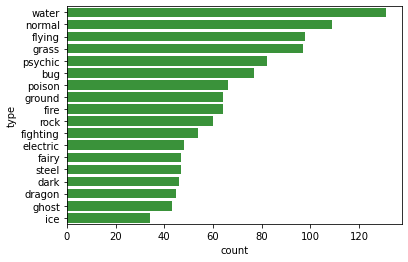

In [33]:
base_color = sb.color_palette()[2]
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order);

In [35]:
n_pokemon = pokemon.shape[0]
max_type_count = type_counts[0]
max_prop = max_type_count / n_pokemon
print(max_prop)

0.1623296158612144


In [37]:
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

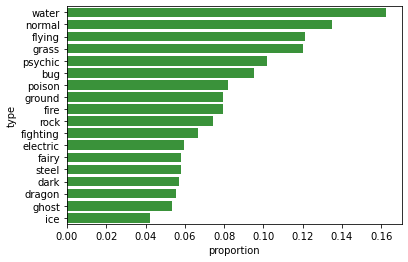

In [39]:
base_color = sb.color_palette()[2]
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order);
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion');

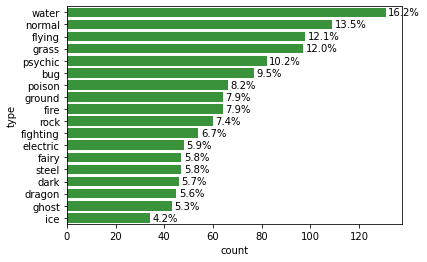

In [42]:
base_color = sb.color_palette()[2]
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order);

for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)
    plt.text(count+1, i, pct_string, va = 'center');

#### Histogram

A histogram is used to plot the distribution of a numeric variable. It's the quantitative version of the bar chart. However, rather than plot one bar for each unique numeric value, values are grouped into continuous bins, and one bar for each bin is plotted to depict the number. You can use either Matplotlib or Seaborn to plot the histograms. There is a mild variation in the specifics, such as plotting gaussian-estimation line along with bars in Seabron's distplot(), and the arguments that you can use in either case.

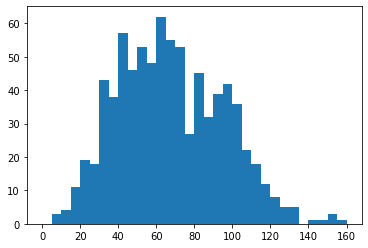

In [49]:
bins = np.arange(0, pokemon['speed'].max()+5, 5)
plt.hist(data = pokemon, x = 'speed', bins = bins);

You can see a non-uniform distribution of data points in different bins.

Overall, a generally bimodal distribution is observed (one with two peaks or humps). The direct adjacency of the bars in the histogram, in contrast to the separated bars in a bar chart, emphasizes the fact that the data takes on a continuous range of values. When a data value is on a bin edge, it is counted in the bin to its right. The exception is the rightmost bin edge, which places data values equal to the uppermost limit into the right-most bin (to the upper limit's left).

By default, the hist function divides the data into 10 bins, based on the range of values taken. In almost every case, we will want to change these settings. Usually, having only ten bins is too few to really understand the distribution of the data. And the default tick marks are often not on nice, 'round' values that make the ranges taken by each bin easy to interpret.

Wouldn't it be better if I said "between 0 and 2.5" instead of "between about 0 and 2.5", and "from 2.5 to 5" instead of "from about 2.5 to 5" above?

You can use descriptive statistics (e.g. via dataframe['column'].describe()) to gauge what minimum and maximum bin limits might be appropriate for the plot. These bin edges can be set using numpy's arange function

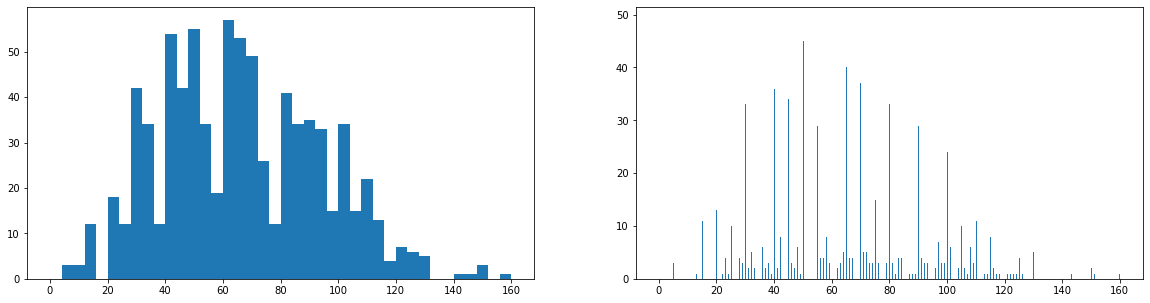

In [94]:
# Resize the chart, and have two plots side-by-side
# Set a larger figure size for subplots
plt.figure(figsize = [20, 5]) 

# histogram on left, example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

C:\Users\heloi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


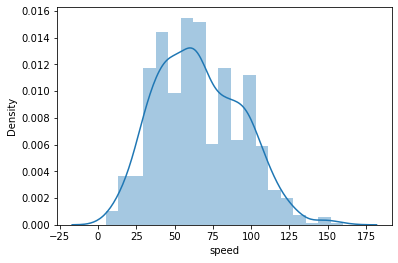

In [50]:
sb.distplot(pokemon['speed']);

The distplot function has built-in rules for specifying histogram bins, and by default plots a curve depicting the kernel density estimate (KDE) on top of the data. The vertical axis is based on the KDE, rather than the histogram: you shouldn't expect the total heights of the bars to equal 1, but the area under the curve should equal 1. If you want to learn more about KDEs, check out the extra page at the end of the lesson.

Despite the fact that the default bin-selection formula used by distplot might be better than the choice of ten bins that .hist uses, you'll still want to do some tweaking to align the bins to 'round' values. You can use other parameter settings to plot just the histogram and specify the bins like before:

C:\Users\heloi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='speed', ylabel='Density'>

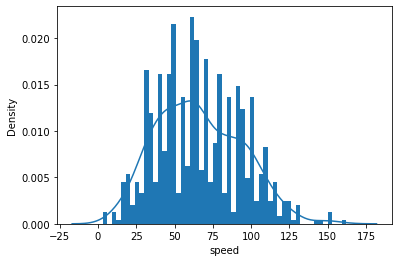

In [93]:
bin_edges = np.arange(0, pokemon['speed'].max()+3, 3)
sb.distplot(pokemon['speed'], bins = bin_edges, kde = True,
            hist_kws = {'alpha' : 1})

C:\Users\heloi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


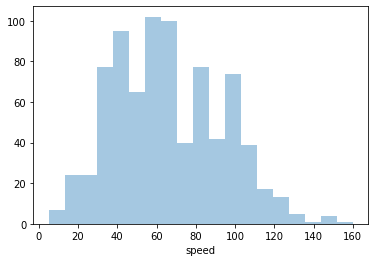

In [51]:
sb.distplot(pokemon['speed'], kde = False);

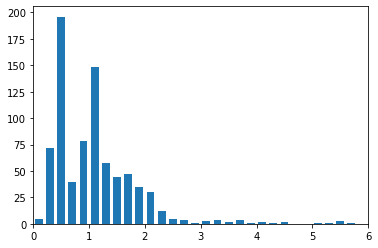

In [95]:
bins = np.arange(0, pokemon['height'].max()+0.2, 0.2)
plt.hist(data = pokemon, x = 'height', bins = bins, rwidth = 0.7);
plt.xlim((0,6));

Certain data distributions will find themselves amenable to scale transformations. The most common example of this is data that follows an approximately log-normal distribution. This is data that, in their natural units, can look highly skewed: lots of points with low values, with a very long tail of data points with large values. However, after applying a logarithmic transform to the data, the data will follow a normal distribution.

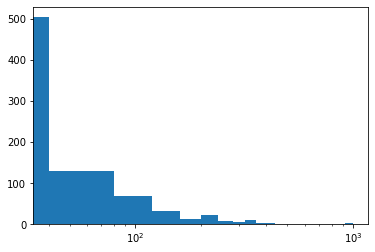

In [97]:
bins = np.arange(0, pokemon['weight'].max()+40, 40)
plt.hist(data = pokemon, x = 'weight', bins = bins);
plt.xscale('log');

In [62]:
pokemon['weight'].describe()

count    807.000000
mean      61.771128
std      111.519355
min        0.100000
25%        9.000000
50%       27.000000
75%       63.000000
max      999.900000
Name: weight, dtype: float64

In [64]:
np.log10(pokemon['weight'].describe())

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

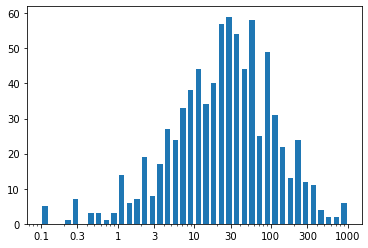

In [98]:
bins = 10 ** np.arange(-1, 3 + 0.1, 0.1)
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = pokemon, x = 'weight', bins = bins, rwidth = 0.7);
plt.xscale('log');
plt.xticks(ticks, labels);

Be aware that a logarithmic transformation is not the only one possible. When we perform a logarithmic transformation, our data values have to all be positive; it's impossible to take a log of zero or a negative number. In addition, the transformation implies that additive steps on the log scale will result in multiplicative changes in the natural scale, an important implication when it comes to data modeling. The type of transformation that you choose may be informed by the context for the data. For example, this Wikipedia section provides a few examples of places where log-normal distributions have been observed.

If you want to use a different transformation that's not available in xscale, then you'll have to perform some feature engineering. In cases like this, we want to be systematic by writing a function that applies both the transformation and its inverse. The inverse will be useful in cases where we specify values in their transformed units and need to get the natural units back. For the purposes of demonstration, let's say that we want to try plotting the above data on a square-root transformation. (Perhaps the numbers represent areas, and we think it makes sense to model the data on a rough estimation of radius, length, or some other 1-d dimension.) We can create a visualization on this transformed scale like this:

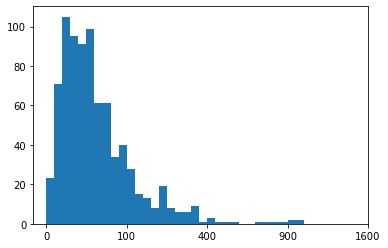

In [99]:
# Custom scaling the given data Series, instead of using the built-in log scale
def sqrt_trans(x, inverse = False):
    """ transformation helper function """
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2

# Bin resizing, to transform the x-axis    
bin_edges = np.arange(0, sqrt_trans(pokemon['weight'].max())+1, 1)

# Plot the scaled data
plt.hist(pokemon['weight'].apply(sqrt_trans), bins = bin_edges)

# Identify the tick-locations
tick_locs = np.arange(0, sqrt_trans(pokemon['weight'].max())+10, 10)

# Apply x-ticks
plt.xticks(tick_locs, sqrt_trans(tick_locs, inverse = True).astype(int));

#### Pie/Donut Chart

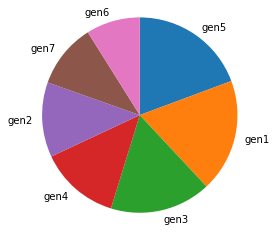

In [88]:
# Use the same pokemon dataset
sorted_counts = pokemon['generation_id'].value_counts()

plt.pie(sorted_counts, labels = ['gen5', 'gen1', 'gen3', 'gen4', 'gen2', 'gen7', 'gen6'], startangle = 90, counterclock = False);

# We have the used option `Square`. 
# Though, you can use either one specified here - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axis.html?highlight=pyplot%20axis#matplotlib-pyplot-axis
plt.axis('square');

Unfortunately, pie charts are a fairly limited plot type in the range of scenarios where they can be used, and it is easy for chart makers to try and spice up pie charts in a way that makes them more difficult to read.

**Guidelines to Use a Pie Chart**

If you want to use a pie chart, try to follow certain guidelines:

Make sure that your interest is in relative frequencies. Areas should represent parts of a whole, rather than measurements on a second variable (unless that second variable can logically be summed up into some whole).

Limit the number of slices plotted. A pie chart works best with two or three slices, though it's also possible to plot with four or five slices as long as the wedge sizes can be distinguished. If you have a lot of categories, or categories that have small proportional representation, consider grouping them together so that fewer wedges are plotted, or use an 'Other' category to handle them.

Plot the data systematically. One typical method of plotting a pie chart is to start from the top of the circle, then plot each categorical level clockwise from most frequent to least frequent. If you have three categories and are interested in the comparison of two of them, a common plotting method is to place the two categories of interest on either side of the 12 o'clock direction, with the third category filling in the remaining space at the bottom.

If these guidelines cannot be met, then you should probably make use of a bar chart instead. A bar chart is a safer choice in general. The bar heights are more precisely interpreted than areas or angles, and a bar chart can be displayed more compactly than a pie chart. There's also more flexibility with a bar chart for plotting variables with a lot of levels, like plotting the bars horizontally.

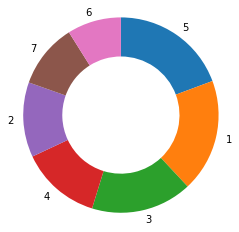

In [87]:
sorted_counts = pokemon['generation_id'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square');

#### Solutions

In [76]:
"""
Script with solutions for all workspace assignments in the Univariate
Exploration of Data lesson.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


def bar_chart_solution_1():
    """
    Solution for Question 1 in bar chart practice: create a bar chart of
    Pokemon species introduced by generation.
    """
    sol_string = ["I used seaborn's countplot function to generate this chart.",
                  "I also added an additional argument so that each bar has the same color."]
    print((" ").join(sol_string))

    # data setup
    pokemon = pd.read_csv('pokemon.csv')

    base_color = sb.color_palette()[0]
    sb.countplot(data = pokemon, x = 'generation_id', color = base_color)


def bar_chart_solution_2():
    """
    Solution for Question 2 in bar chart practice: create a sorted bar chart of
    relative type frequencies.
    """
    sol_string = ["I created a horizontal bar chart since there are a lot of",
                  "Pokemon types. The unique() method was used to get the",
                  "number of different Pokemon species. I also added an xlabel",
                  "call to make sure it was clear the bar length represents",
                  "a relative frequency.\n\n"]
    print((" ").join(sol_string))

    # data setup
    pokemon = pd.read_csv('pokemon.csv')
    pkmn_types = pokemon.melt(id_vars = ['id','species'], 
                          value_vars = ['type_1', 'type_2'], 
                          var_name = 'type_level', value_name = 'type').dropna()

    # Display the frequency of each type.
    print('The frequency of each type is:\n', pkmn_types['type_level'].value_counts())
    
    # get order of bars by frequency
    type_counts = pkmn_types['type'].value_counts()
    type_order = type_counts.index

    # Compute largest proportion
    # Returns the sum of all not-null values in `type` column
    n_pokemon = pkmn_types['type'].value_counts().sum()
    max_type_count = type_counts[0]
    max_prop = max_type_count / n_pokemon

    # establish tick locations and create plot
    base_color = sb.color_palette()[0]
    tick_props = np.arange(0, max_prop, 0.02)
    tick_names = ['{:0.2f}'.format(v) for v in tick_props]

    base_color = sb.color_palette()[0]
    sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order)
    plt.xticks(tick_props * n_pokemon, tick_names)
    plt.xlabel('proportion')


def histogram_solution_1():
    """
    Solution for Question 1 in histogram practice: create a histogram of
    Pokemon special defense values.
    """
    sol_string = ["I've used matplotlib's hist function to plot the data.",
                  "I have also used numpy's arange function to set the bin edges.",
                  "A bin size of 5 hits the main cut points, revealing a smooth,",
                  "but skewed curves. Are there similar characteristics among",
                  "Pokemon with the highest special defenses?"]
    print((" ").join(sol_string))

    # data setup
    pokemon = pd.read_csv('pokemon.csv')

    bins = np.arange(20, pokemon['special-defense'].max()+5, 5)
    plt.hist(pokemon['special-defense'], bins = bins)


def scales_solution_1():
    """
    Solution for Question 1 in scales and transformation practice: create a
    histogram of Pokemon heights.
    """
    sol_string = ["There's a very long tail of Pokemon heights. Here, I've",
                  "focused in on Pokemon of height 6 meters or less, so that I",
                  "can use a smaller bin size to get a more detailed look at",
                  "the main data distribution."]
    print((" ").join(sol_string))

    # data setup
    pokemon = pd.read_csv('pokemon.csv')

    bins = np.arange(0, pokemon['height'].max()+0.2, 0.2)
    plt.hist(data = pokemon, x = 'height', bins = bins)
    plt.xlim((0,6))


def scales_solution_2():
    """
    Solution for Question 2 in scales and transformation practice: create a
    histogram of Pokemon weights.
    """
    sol_string = ["Since Pokemon weights are so skewed, I used a log transformation",
                  "on the x-axis. Bin edges are in increments of 0.1 powers of ten,",
                  "with custom tick marks to demonstrate the log scaling."]
    print((" ").join(sol_string))

    # data setup
    pokemon = pd.read_csv('pokemon.csv')

    bins = 10 ** np.arange(-1, 3.0+0.1, 0.1)
    ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
    labels = ['{}'.format(val) for val in ticks]

    plt.hist(data = pokemon, x = 'weight', bins = bins)
    plt.xscale('log')
    plt.xticks(ticks, labels)
    plt.xlabel('Weight (kg)')

I've used matplotlib's hist function to plot the data. I have also used numpy's arange function to set the bin edges. A bin size of 5 hits the main cut points, revealing a smooth, but skewed curves. Are there similar characteristics among Pokemon with the highest special defenses?


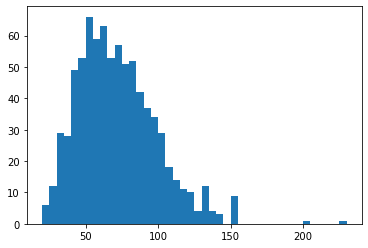

In [82]:
histogram_solution_1()

There's a very long tail of Pokemon heights. Here, I've focused in on Pokemon of height 6 meters or less, so that I can use a smaller bin size to get a more detailed look at the main data distribution.


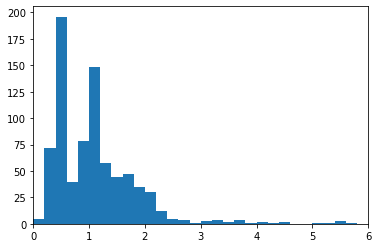

In [84]:
scales_solution_1()

Since Pokemon weights are so skewed, I used a log transformation on the x-axis. Bin edges are in increments of 0.1 powers of ten, with custom tick marks to demonstrate the log scaling.


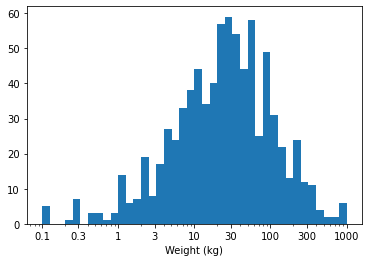

In [85]:
scales_solution_2()

### Bivariate Exploration of Data

#### Scatterplots

If we want to inspect the relationship between two numeric variables, the standard choice of plot is the scatterplot. In a scatterplot, each data point is plotted individually as a point, its x-position corresponding to one feature value and its y-position corresponding to the second

Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

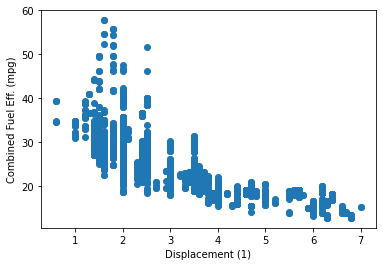

In [103]:
# Read the CSV file
fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head(10)

# Scatter plot
plt.scatter(data = fuel_econ, x = 'displ', y = 'comb');
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

In the example above, the relationship between the two variables is negative because as higher values of the x-axis variable are increasing, the values of the variable plotted on the y-axis are decreasing.

Alternative Approach - seaborn.regplot()

Seaborn's regplot() function combines scatterplot creation with regression function fitting:

Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

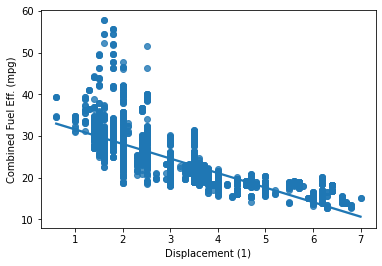

In [104]:
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb');
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

You can even plot the regression line on the transformed data as shown in the example below.

C:\Users\heloi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


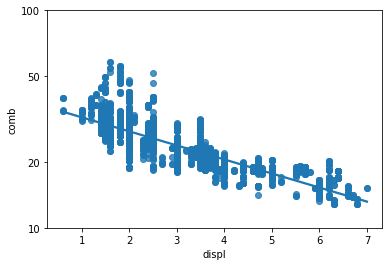

In [105]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

sb.regplot(fuel_econ['displ'], fuel_econ['comb'].apply(log_trans))
tick_locs = [10, 20, 50, 100]
plt.yticks(log_trans(tick_locs), tick_locs);

#### Overplotting, Sampling, Transparency, and Jitter

If we have a very large number of points to plot or our numeric variables are discrete-valued, then it is possible that using a scatterplot straightforwardly will not be informative. The visualization will suffer from overplotting, where the high amount of overlap in points makes it difficult to see the actual relationship between the plotted variables.

Let's see an example below for each Jitter to move the position of each point slightly from its true value. Jitter is not a direct option in matplotlib's scatter() function, but is a built-in option with seaborn's regplot() function. The x- and y- jitter can be added independently, and won't affect the fit of any regression function, if made.

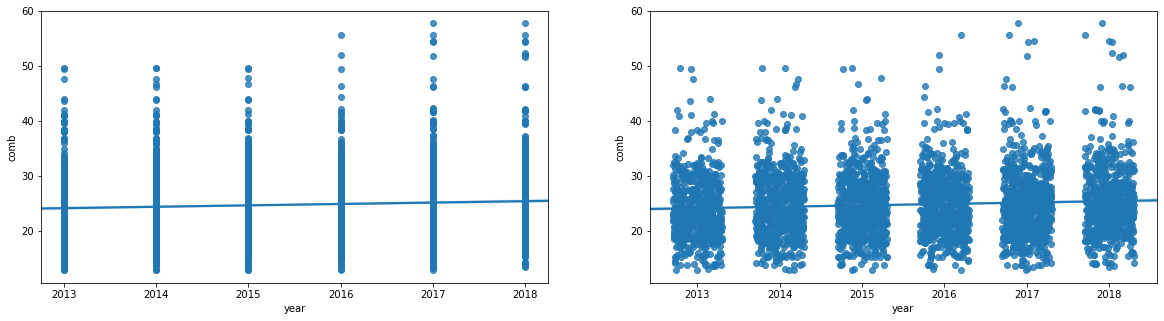

In [107]:
# Example 1. Jitter - Randomly add/subtract a small value to each data point

# Read the CSV file
fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head(10)

##########################################
# Resize figure to accommodate two plots
plt.figure(figsize = [20, 5])

# PLOT ON LEFT - SIMPLE SCATTER
plt.subplot(1, 2, 1)
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=False);

##########################################
# PLOT ON RIGHT - SCATTER PLOT WITH JITTER
plt.subplot(1, 2, 2)

# In the sb.regplot() function below, the `truncate` argument accepts a boolean.
# If truncate=True, the regression line is bounded by the data limits. 
# Else if truncate=False, it extends to the x axis limits.
# The x_jitter will make each x value will be adjusted randomly by +/-0.3
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=False, x_jitter=0.3);

In the left scatter plot above, the degree of variability in the data and strength of relationship are fairly unclear. In cases like this, we may want to employ transparency and jitter to make the scatterplot more informative. The right scatter plot has a jitter introduced to the data points.

You can add transparency to either scatter() or regplot() by adding the "alpha" parameter set to a value between 0 (fully transparent, not visible) and 1 (fully opaque). See the example below.

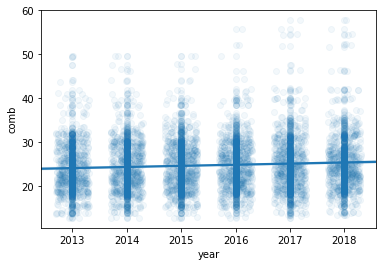

In [108]:
# Example 2. Plot with both Jitter and Transparency

# The scatter_kws helps specifying the opaqueness of the data points. 
# The alpha take a value between [0-1], where 0 represents transparent, and 1 is opaque. 
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20});

# Alternative way to plot with the transparency.
# The scatter() function below does NOT have any argument to specify the Jitter
plt.scatter(data = fuel_econ, x = 'year', y = 'comb', alpha=1/20);

In the plot above, the jitter settings will cause each point to be plotted in a uniform ±0.3 range of their true values. Note that transparency has been changed to be a dictionary assigned to the "scatter_kws" parameter.

#### Heat Maps

A heat map is a 2-d version of the histogram that can be used as an alternative to a scatterplot. Like a scatterplot, the values of the two numeric variables to be plotted are placed on the plot axes. Similar to a histogram, the plotting area is divided into a grid and the number of points in each grid rectangle is added up. Since there won't be room for bar heights, counts are indicated instead by grid cell color. A heat map can be implemented with Matplotlib's hist2d() function.

Heat maps are useful in the following cases:

* To represent a plot for discrete vs. another discrete variable
* As an alternative to transparency when the data points are enormous

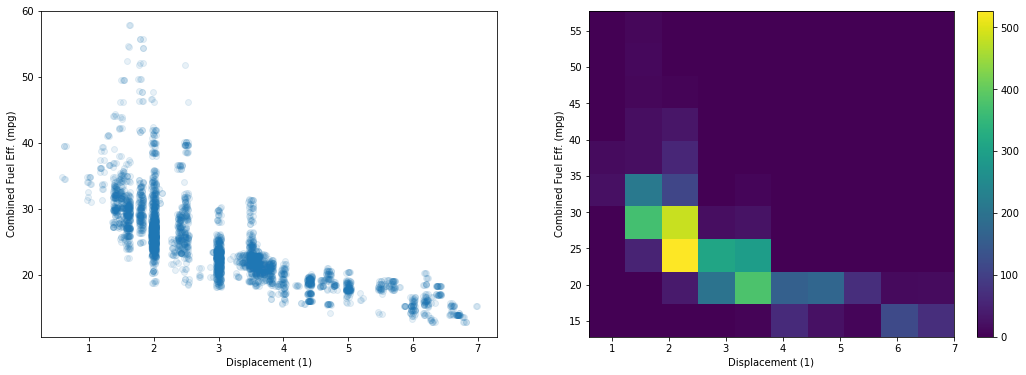

In [110]:
# Example 1. Default heat plot using Matplotlib.pyplot.hist2d() function

# Read the CSV file
fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head(10)


plt.figure(figsize = [18, 6])

# PLOT ON LEFT
plt.subplot(1, 2, 1)
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# PLOT ON RIGHT
plt.subplot(1, 2, 2)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

In the example above, we added a colorbar() function call to add a colorbar to the side of the plot, showing the mapping from counts to colors.

To select a different color palette, you can set the "cmap" parameter in hist2d. The most convenient way of doing this is to set the "cmap" value as a string referencing a built-in Matplotlib palette. A list of valid strings can be found on this part of the Pyplot API documentation. A further discussion of color in plots will be left to the next lesson. For now, I will just show an example of reversing the default "viridis" color palette, by setting cmap = 'viridis_r'.

Furthermore, I would like to distinguish cells with zero counts from those with non-zero counts. The "cmin" parameter specifies the minimum value in a cell before it will be plotted. By adding a cmin = 0.5 parameter to the hist2d call, this means that a cell will only get colored if it contains at least one point.

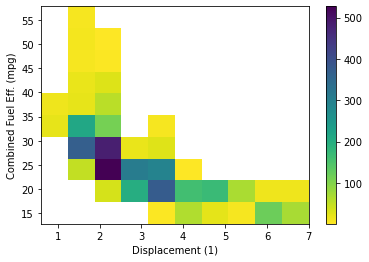

In [111]:
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

As the count of points in the cell increases, the color in the heatmap gets brighter and moves from blue to yellow.

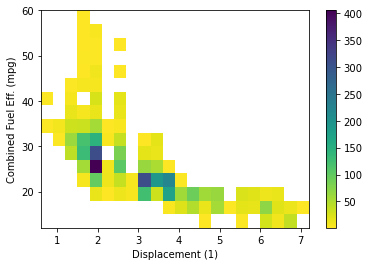

In [112]:
# Specify bin edges 
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)

plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Notice the areas of high frequency in the middle of the negative trend in the plot.


Notice that since we have two variables, the "bins" parameter takes a list of two bin edge specifications, one for each dimension. Choosing an appropriate bin size is just as important here as it was for the univariate histogram.

If you have a lot of data, you might want to add annotations to cells in the plot indicating the count of points in each cell. From hist2d, this requires the addition of text elements one by one, much like how text annotations were added one by one to the bar plots in the previous lesson. We can get the counts to annotate directly from what is returned by hist2d, which includes not just the plotting object, but an array of counts and two vectors of bin edges.

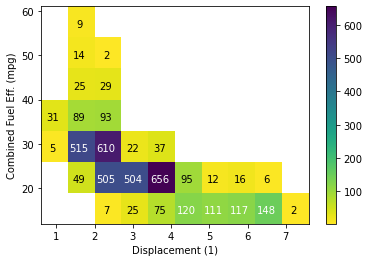

In [120]:
# Specify bin edges 
bins_x = np.arange(0.6, 7+0.7, 0.7)
bins_y = np.arange(12, 58+7, 7)
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
h2d = plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])

plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Select the bi-dimensional histogram, a 2D array of samples x and y. 
# Values in x are histogrammed along the first dimension and 
# values in y are histogrammed along the second dimension.
counts = h2d[0]

# Add text annotation on each cell
# Loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 100: # increase visibility on darker cells
            plt.text(bins_x[i]+0.3, bins_y[j]+3, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.3, bins_y[j]+3, int(c),
                     ha = 'center', va = 'center', color = 'black')

If you have too many cells in your heat map, then the annotations will end up being too overwhelming, too much to attend to. In cases like that, it's best to leave off the annotations and let the data and colorbar speak for themselves.

You're more likely to see annotations in a categorical heat map, where there are going to be fewer cells plotted. Indeed, there is a parameter built into seaborn's heatmap() function that is built for categorical heatmaps, as will be seen later.

#### Violin Plots

There are a few ways of plotting the relationship between one quantitative and one qualitative variable, that demonstrate the data at different levels of abstraction. The violin plot is on the lower level of abstraction. For each level of the categorical variable, a distribution of the values on the numeric variable is plotted. The distribution is plotted as a kernel density estimate, something like a smoothed histogram. There is an extra section at the end of the previous lesson that provides more insight into kernel density estimates

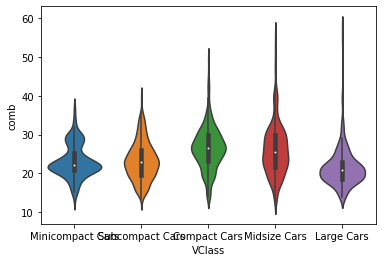

In [6]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Read the CSV file
fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head(10)

# Types of sedan cars
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# Returns the types for sedan_classes with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

sb.violinplot(data=fuel_econ, x='VClass', y='comb');

You can see that each level has been rendered in a different color, like how the plain countplot() was in the previous lesson. We can set the "color" parameter to make each curve the same color if it is not meaningful.

Inside each curve, there is a black shape with a white dot inside, a miniature box plot. A further discussion of box plots will be performed on the next page. If you'd like to remove the box plot, you can set the inner = None parameter in the violinplot call to simplify the look of the final visualization.

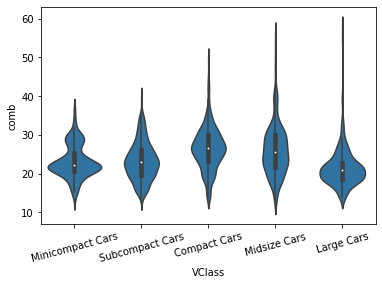

In [7]:
base_color = sb.color_palette()[0]

# The "inner" argument represents the datapoints in the violin interior. 
# It can take any value from {“box”, “quartile”, “point”, “stick”, None}
# If "box", it draws a miniature boxplot. 
sb.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color, innner=None)
plt.xticks(rotation=15);

Much like how the bar chart could be rendered with horizontal bars, the violin plot can also be rendered horizontally. Seaborn is smart enough to make an appropriate inference on which orientation is requested, depending on whether "x" or "y" receives the categorical variable. But if both variables are numeric (e.g., one is discretely-valued) then the "orient" parameter can be used to specify the plot orientation.


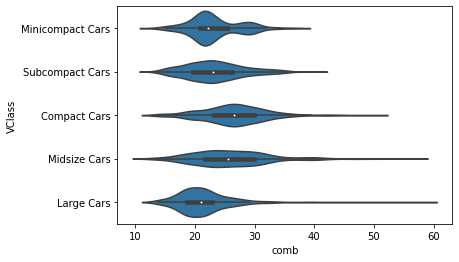

In [8]:
sb.violinplot(data=fuel_econ, y='VClass', x='comb', color=base_color, innner=None);

#### Box Plots

A box plot is another way of showing the relationship between a numeric variable and a categorical variable. Compared to the violin plot, the box plot leans more on the summarization of the data, primarily just reporting a set of descriptive statistics for the numeric values on each categorical level. A box plot can be created using seaborn's boxplot() function.

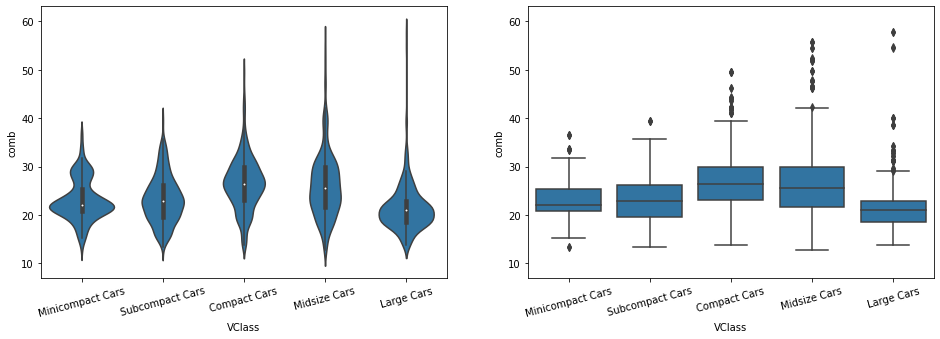

In [10]:
# Step 1. Import packages

# Step 2. Load data

# Step 3. Convert the "VClass" column from a plain object type into an ordered categorical type 
# Types of sedan cars
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# Returns the types for sedan_classes with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

# Step 4.  TWO PLOTS IN ONE FIGURE
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color, innner='quartile')
plt.xticks(rotation=15);

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=15);
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot

Note that the "color" parameter is being used here to make each box the same color. In order to provide a better comparison of the violin and box plots, a ylim expression has been added to the second plot to match the two plots' y-axis limits. The Axes object returned by violinplot() is assigned to a variable, ax1 is used to programmatically obtain those limit values.

The inner boxes and lines in the violin plot match up with the boxes and whiskers in the box plot. In a box plot, the central line in the box indicates the median of the distribution, while the top and bottom of the box represent the third and first quartiles of the data, respectively. Thus, the height of the box is the interquartile range (IQR). From the top and bottom of the box, the whiskers indicate the range from the first or third quartiles to the minimum or maximum value in the distribution. Typically, a maximum range is set on whisker length; by default, this is 1.5 times the IQR. For the Gamma level, there are points below the lower whisker that indicate individual outlier points that are more than 1.5 times the IQR below the first quartile.

Comparing the two plots, the box plot is a cleaner summary of the data than the violin plot. It's easier to compare statistics between the groups with a box plot. This makes a box plot worth more consideration if you have a lot of groups to compare, or if you are building explanatory plots. You can clearly see from the box plot that the Delta group has the lowest median. On the other hand, the box plot lacks as nuanced a depiction of distributions as the violin plot: you can't see the slight bimodality present in the Alpha level values. The violin plot may be a better option for exploration, especially since seaborn's implementation also includes the box plot by default.

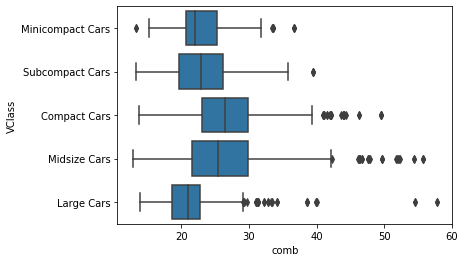

In [12]:
sb.boxplot(data=fuel_econ, y='VClass', x='comb', color=base_color);

In violinplot, there is an additional option for plotting summary statistics in the violin, beyond the default mini box plot. By setting inner = 'quartile', three lines will be plotted within each violin area for the three middle quartiles. The line with thick dashes indicates the median, and the two lines with shorter dashes on either side the first and third quartiles.

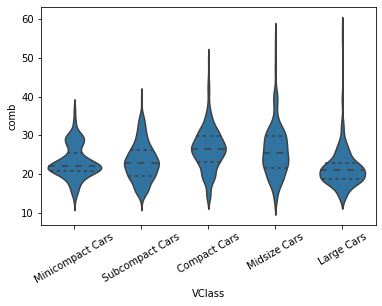

In [13]:
base_color = sb.color_palette()[0]
sb.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color, inner='quartile')
plt.xticks(rotation=30);

plot the relationship between vehicle class and engine displacement.

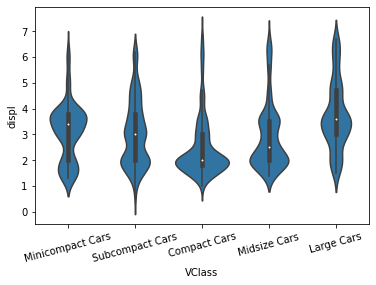

In [20]:
# data setup
fuel_econ = pd.read_csv('fuel-econ.csv')

sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
    fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)
else: # pre-v0.21
    fuel_econ['VClass'] = fuel_econ['VClass'].astype('category', ordered = True,
                                                         categories = sedan_classes)

# plotting
base_color = sb.color_palette()[0]
sb.violinplot(data = fuel_econ, x = 'VClass', y = 'displ',
                  color = base_color);
plt.xticks(rotation = 15);

#### Clustered Bar Charts

To depict the relationship between two categorical variables, we can extend the univariate bar chart seen in the previous lesson into a clustered bar chart. Like a standard bar chart, we still want to depict the count of data points in each group, but each group is now a combination of labels on two variables. So we want to organize the bars into an order that makes the plot easy to interpret. In a clustered bar chart, bars are organized into clusters based on levels of the first variable, and then bars are ordered consistently across the second variable within each cluster. This is easiest to see with an example, using seaborn's countplot function. To take the plot from univariate to bivariate, we add the second variable to be plotted under the "hue" argument:

In [22]:
# Types of sedan cars
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# Returns the types for sedan_classes with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

# The existing `trans` column has multiple sub-types of Automatic and Manual. 
# But, we need plain two types, either Automatic or Manual. Therefore, add a new column. 

# The Series.apply() method invokes the `lambda` function on each value of `trans` column.
# In python, a `lambda` function is an anonymous function that can have only one expression.
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x:x.split()[0])
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic


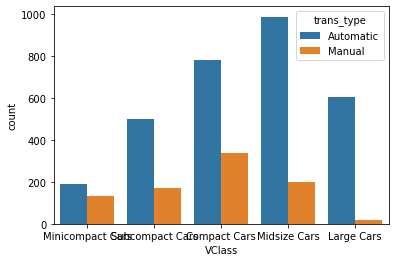

In [24]:
sb.countplot(data = fuel_econ, x = 'VClass', hue = 'trans_type');

One alternative way of depicting the relationship between two categorical variables is through a heat map. Heat maps were introduced earlier as the 2-D version of a histogram; here, we're using them as the 2-D version of a bar chart. The seaborn function heatmap() is at home with this type of heat map implementation, but the input arguments are unlike most of the visualization functions that have been introduced in this course. Instead of providing the original dataframe, we need to summarize the counts into a matrix that will then be plotted.

In [27]:
# Use group_by() and size() to get the number of cars and each combination of the two variable levels as a pandas Series
ct_counts = fuel_econ.groupby(['VClass', 'trans_type']).size()

# Use Series.reset_index() to convert a series into a dataframe object
ct_counts = ct_counts.reset_index(name='count')

# Use DataFrame.pivot() to rearrange the data, to have vehicle class on rows
ct_counts = ct_counts.pivot(index = 'VClass', columns = 'trans_type', values = 'count')

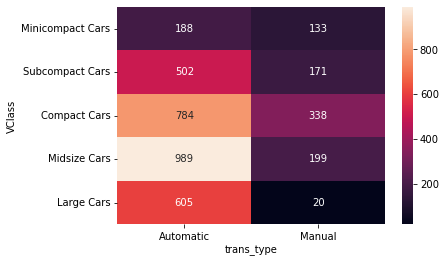

In [31]:
sb.heatmap(ct_counts, annot = True, fmt = 'd');

annot = True makes it so annotations show up in each cell, but the default string formatting only goes to two digits of precision. Adding fmt = 'd' means that annotations will all be formatted as integers instead. You can use fmt = '.0f' if you have any cells with no counts, in order to account for NaNs.

#### Faceting

One general visualization technique that will be useful for you to know about to handle plots of two or more variables is faceting. In faceting, the data is divided into disjoint subsets, most often by different levels of a categorical variable. For each of these subsets of the data, the same plot type is rendered on other variables. Faceting is a way of comparing distributions or relationships across levels of additional variables, especially when there are three or more variables of interest overall. While faceting is most useful in multivariate visualization, it is still valuable to introduce the technique here in our discussion of bivariate plots.

For example, rather than depicting the relationship between one numeric variable and one categorical variable using a violin plot or box plot, we could use faceting to look at a histogram of the numeric variable for subsets of the data divided by categorical variable levels. Seaborn's FacetGrid class facilitates the creation of faceted plots. There are two steps involved in creating a faceted plot. First, we need to create an instance of the FacetGrid object and specify the feature we want to facet by (vehicle class, "VClass" in our example). Then we use the map method on the FacetGrid object to specify the plot type and variable(s) that will be plotted in each subset (in this case, the histogram on combined fuel efficiency "comb").

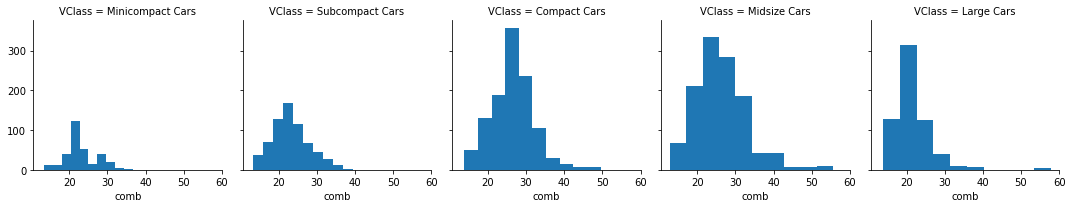

In [33]:
# Preparatory Step
fuel_econ = pd.read_csv('fuel-econ.csv')

# Convert the "VClass" column from a plain object type into an ordered categorical type
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

# Plot the Seaborn's FacetGrid
g = sb.FacetGrid(data = fuel_econ, col = 'VClass')
g.map(plt.hist, "comb")

In the map call, just set the plotting function and variable to be plotted as positional arguments. Don't set them as keyword arguments, like x = "comb", or the mapping won't work properly.

Notice that each subset of the data is being plotted independently. Each uses the default of ten bins from hist to bin together the data, and each plot has a different bin size. Despite that, the axis limits on each facet are the same to allow clear and direct comparisons between groups. It's still worth cleaning things a little bit more by setting the same bin edges on all facets. Extra visualization parameters can be set as additional keyword arguments to the map function.

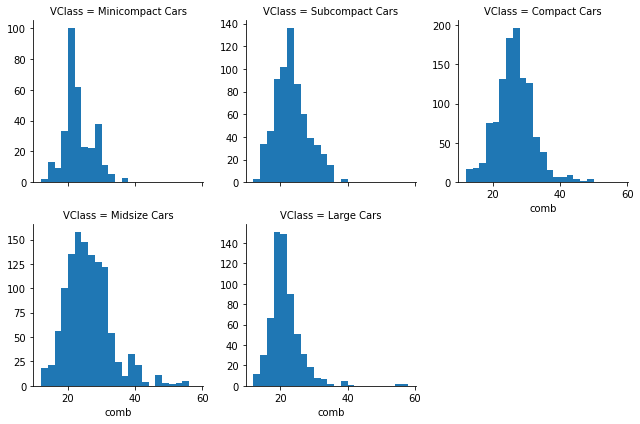

In [41]:
import numpy as np

bin_edges = np.arange(12, 58+2, 2)

# Try experimenting with dynamic bin edges
# bin_edges = np.arange(-3, fuel_econ['comb'].max()+1/3, 1/3)

g = sb.FacetGrid(data = fuel_econ, col = 'VClass', col_wrap=3, sharey=False)
g.map(plt.hist, 'comb', bins = bin_edges);

If you have many categorical levels to plot, then you might want to add more arguments to the FacetGrid object's initialization to facilitate clarity in the conveyance of information. The example below includes a categorical variable, "trans", that has 27 different transmission types. Setting col_wrap = 7 means that the plots will be organized into rows of 7 facets each, rather than a single long row of 27 plots.

Also, we want to have the facets for each transmission type in the decreasing order of combined fuel efficiency.

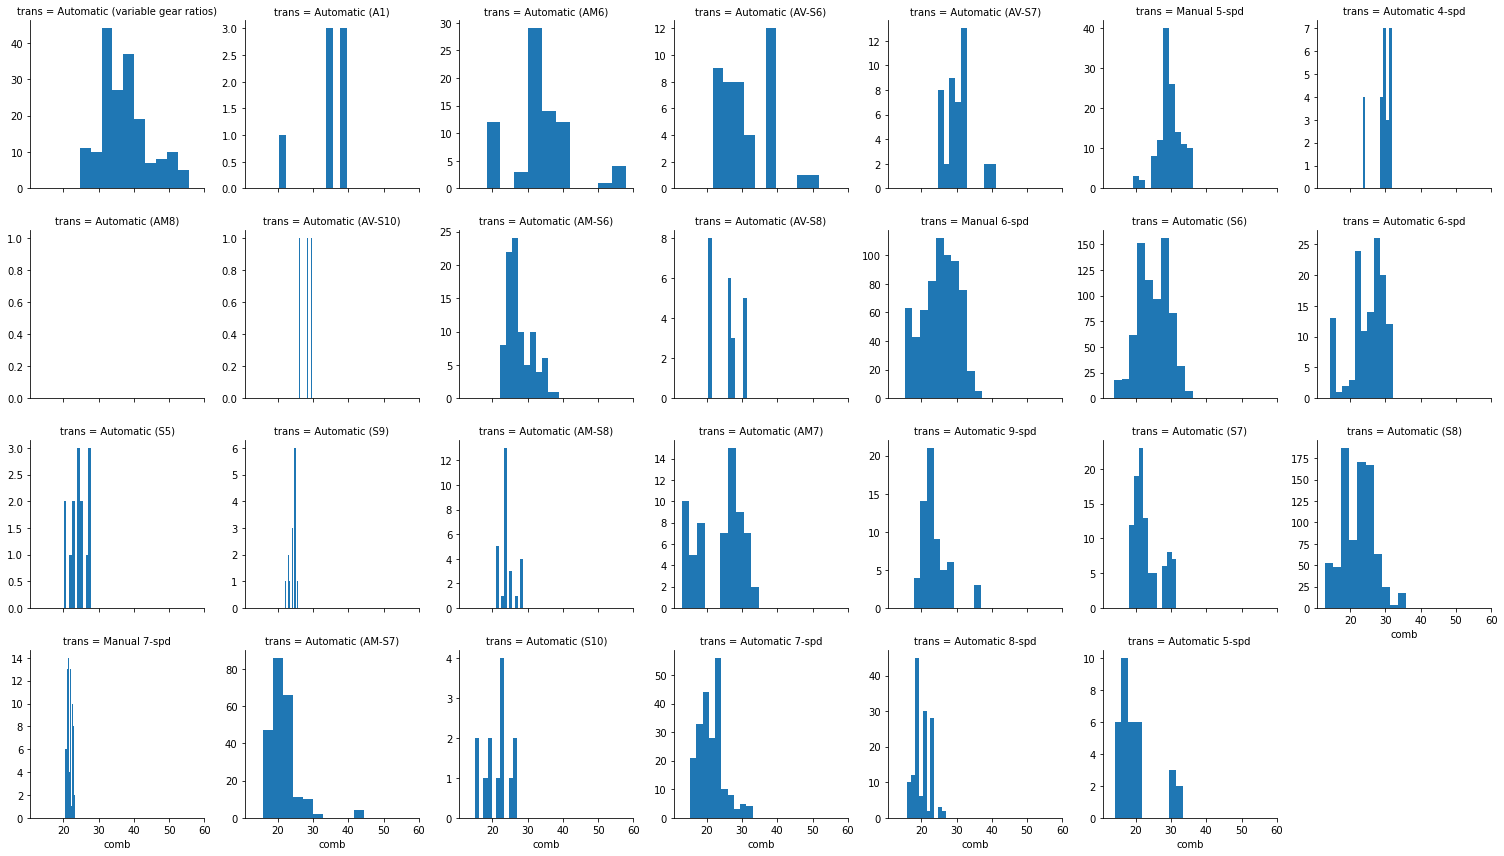

In [40]:
# Find the order in which you want to display the Facets
# For each transmission type, find the combined fuel efficiency
group_means = fuel_econ[['trans', 'comb']].groupby(['trans']).mean()

# Select only the list of transmission type in the decreasing order of combined fuel efficiency
group_order = group_means.sort_values(['comb'], ascending = False).index

# Use the argument col_order to display the FacetGrid in the desirable group_order
g = sb.FacetGrid(data = fuel_econ, col = 'trans', col_wrap = 7, col_order = group_order, sharey = False);
g.map(plt.hist, 'comb');

#### Line Plots

The line plot is a fairly common plot type that is used to plot the trend of one numeric variable against values of a second variable. In contrast to a scatterplot, where all data points are plotted, in a line plot, only one point is plotted for every unique x-value or bin of x-values (like a histogram). If there are multiple observations in an x-bin, then the y-value of the point plotted in the line plot will be a summary statistic (like mean or median) of the data in the bin. The plotted points are connected with a line that emphasizes the sequential or connected nature of the x-values.

If the x-variable represents time, then a line plot of the data is frequently known as a time series plot. For example, we have only one observation per time period, like in stock or currency charts.

We will make use of Matplotlib's errorbar() function, performing some processing on the data in order to get it into its necessary form.

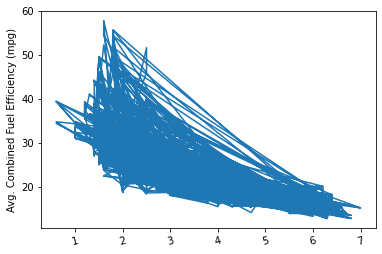

In [42]:
plt.errorbar(data=fuel_econ, x='displ', y='comb')
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

If we just blindly stick a dataframe into the function without considering its structure, we might end up with a mess like the above. The function just plots all the data points as a line, connecting values from the first row of the dataframe to the last row. In order to create the line plot as intended, we need to do additional work to summarize the data.

In [44]:
# Set a number of bins into which the data will be grouped.
# Set bin edges, and compute center of each bin 
bin_edges = np.arange(0.6, 7+0.2, 0.2)
bin_centers = bin_edges[:-1] + 0.1

# Cut the bin values into discrete intervals. Returns a Series object.
displ_binned = pd.cut(fuel_econ['displ'], bin_edges, include_lowest = True)
displ_binned

0       (3.6, 3.8]
1       (1.8, 2.0]
2       (3.4, 3.6]
3       (3.4, 3.6]
4       (2.2, 2.4]
           ...    
3924    (1.6, 1.8]
3925    (1.8, 2.0]
3926    (1.8, 2.0]
3927    (3.2, 3.4]
3928    (3.2, 3.4]
Name: displ, Length: 3929, dtype: category
Categories (32, interval[float64, right]): [(0.599, 0.8] < (0.8, 1.0] < (1.0, 1.2] < (1.2, 1.4] ... (6.2, 6.4] < (6.4, 6.6] < (6.6, 6.8] < (6.8, 7.0]]

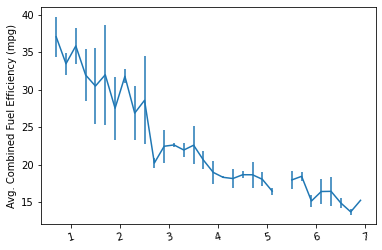

In [45]:
# For the points in each bin, we compute the mean and standard error of the mean.
comb_mean = fuel_econ['comb'].groupby(displ_binned).mean()
comb_std = fuel_econ['comb'].groupby(displ_binned).std()

# Plot the summarized data
plt.errorbar(x=bin_centers, y=comb_mean, yerr=comb_std)
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

Since the x-variable ('displ') is continuous, we first set a number of bins into which the data will be grouped. In addition to the usual edges, the center of each bin is also computed for later plotting. For the points in each bin, we compute the mean and standard error of the mean.

Instead of computing summary statistics on fixed bins, you can also make computations on a rolling window through use of pandas' rolling method. Since the rolling window will make computations on sequential rows of the dataframe, we should use sort_values to put the x-values in ascending order first.

In [46]:
# compute statistics in a rolling window
df_window = df.sort_values('num_var1').rolling(15)
x_winmean = df_window.mean()['num_var1']
y_median = df_window.median()['num_var2']
y_q1 = df_window.quantile(.25)['num_var2']
y_q3 = df_window.quantile(.75)['num_var2']

# plot the summarized data
base_color = sb.color_palette()[0]
line_color = sb.color_palette('dark')[0]
plt.scatter(data = df, x = 'num_var1', y = 'num_var2')
plt.errorbar(x = x_winmean, y = y_median, c = line_color)
plt.errorbar(x = x_winmean, y = y_q1, c = line_color, linestyle = '--')
plt.errorbar(x = x_winmean, y = y_q3, c = line_color, linestyle = '--')

plt.xlabel('num_var1')
plt.ylabel('num_var2')

NameError: name 'df' is not defined

Another bivariate application of line plots is to plot the distribution of a numeric variable for different levels of a categorical variable. This is another alternative to using violin plots, box plots, and faceted histograms. With the line plot, one line is plotted for each category level, like overlapping the histograms on top of one another. This can be accomplished through multiple errorbar calls using the methods above, or by performing multiple hist calls, setting the "histtype = step" parameter so that the bars are depicted as unfilled lines.

In [47]:
bin_edges = np.arange(-3, df['num_var'].max()+1/3, 1/3)
g = sb.FacetGrid(data = df, hue = 'cat_var', size = 5)
g.map(plt.hist, "num_var", bins = bin_edges, histtype = 'step')
g.add_legend()

NameError: name 'df' is not defined

Note that I'm performing the multiple hist calls through the use of FacetGrid, setting the categorical variable on the "hue" parameter rather than the "col" parameter. You'll see more of this parameter of FacetGrid in the next lesson. I've also added an add_legend method call so that we can identify which level is associated with each curve.

Unfortunately, the "Alpha" curve seems to be pretty lost behind the other three curves since the relatively low number of counts is causing a lot of overlap. Perhaps connecting the centers of the bars with a line, like what was seen in the first errorbar example, would be better.

Functions you provide to the map method of FacetGrid objects do not need to be built-ins. Below, I've written a function to perform the summarization operations seen above to plot an errorbar line for each level of the categorical variable, then fed that function (freq_poly) to map.

In [48]:
def freq_poly(x, bins = 10, **kwargs):
    """ Custom frequency polygon / line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    counts = x.groupby(data_bins).count()

    # create plot
    plt.errorbar(x = bin_centers, y = counts, **kwargs)

bin_edges = np.arange(-3, df['num_var'].max()+1/3, 1/3)
g = sb.FacetGrid(data = df, hue = 'cat_var', size = 5)
g.map(freq_poly, "num_var", bins = bin_edges)
g.add_legend()

NameError: name 'df' is not defined

C:\Users\heloi\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


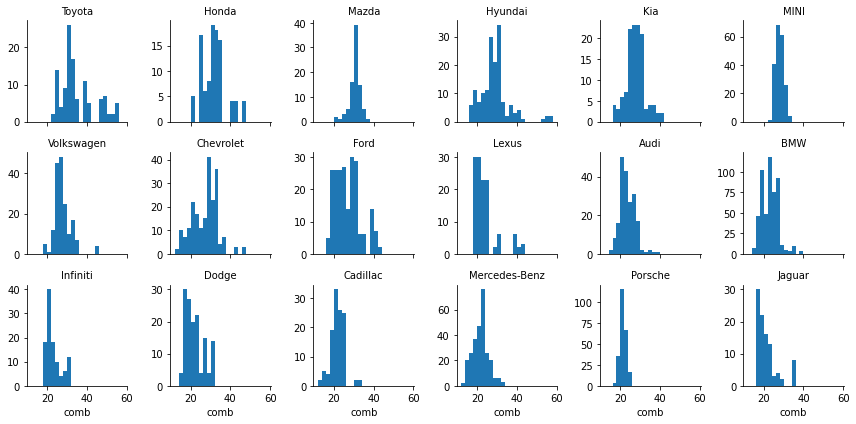

In [53]:
# data setup
fuel_econ = pd.read_csv('fuel-econ.csv')
    
THRESHOLD = 80
make_frequency = fuel_econ['make'].value_counts()
idx = np.sum(make_frequency > THRESHOLD)

most_makes = make_frequency.index[:idx]
fuel_econ_sub = fuel_econ.loc[fuel_econ['make'].isin(most_makes)]

make_means = fuel_econ_sub.groupby('make').mean()
comb_order = make_means.sort_values('comb', ascending = False).index

# plotting
g = sb.FacetGrid(data = fuel_econ_sub, col = 'make', col_wrap = 6, size = 2,
                     col_order = comb_order, sharey = False)
# try sb.distplot instead of plt.hist to see the plot in terms of density!
g.map(plt.hist, 'comb', bins = np.arange(12, fuel_econ_sub['comb'].max()+2, 2))
g.set_titles('{col_name}');

Text(0.5, 0, 'Average Combined Fuel Eff. (mpg)')

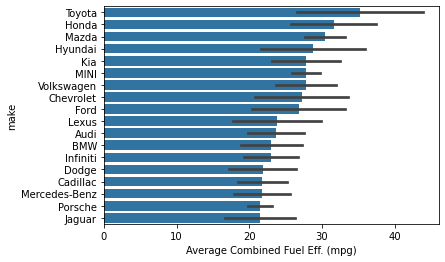

In [54]:
# data setup
fuel_econ = pd.read_csv('fuel-econ.csv')
    
THRESHOLD = 80
make_frequency = fuel_econ['make'].value_counts()
idx = np.sum(make_frequency > THRESHOLD)

most_makes = make_frequency.index[:idx]
fuel_econ_sub = fuel_econ.loc[fuel_econ['make'].isin(most_makes)]

make_means = fuel_econ_sub.groupby('make').mean()
comb_order = make_means.sort_values('comb', ascending = False).index

# plotting
base_color = sb.color_palette()[0]
sb.barplot(data = fuel_econ_sub, x = 'comb', y = 'make',
               color = base_color, order = comb_order, ci = 'sd')
plt.xlabel('Average Combined Fuel Eff. (mpg)')

There might be cases where you are interested to see how closely your numeric data follows some hypothetical distribution. This might be important for certain parametric statistical tests, like checking for assumptions of normality. In cases like this, you can use a quantile-quantile plot, or Q-Q plot, to make a visual comparison between your data and your reference distribution. Take for example the following comparison of the following data and a hypothetical normal distribution using the sample statistics:

In [55]:
# create a histogram of the data
bin_size = 0.5
bin_edges = np.arange(4, 18 + bin_size, bin_size)
plt.hist(data = df, x = 'num_var', bins = bin_edges);

# overlay a theoretical normal distribution on top
samp_mean = df['num_var'].mean()
samp_sd = df['num_var'].std()

from scipy.stats import norm
x = np.linspace(4, 18, 200)
y = norm.pdf(x, samp_mean, samp_sd) # normal distribution heights
y *= df.shape[0] * bin_size # scale the distribution height

plt.plot(x, y)

NameError: name 'df' is not defined

The matplotlib plot function is a generic function for plotting y-values against x-values, by default a line connecting each x-y pair in sequence. In this case, I first use numpy's linspace function to generate x-values across the range of the plot. Note that the first two arguments match the bin_edges limits, while the third argument specifies the number of values to generate between the two endpoints. Then, I use the scipy package's norm class to get the height of the normal distribution curve at those x-values, using the sample mean and standard deviation as distribution parameters. pdf stands for probability density function, which returns the normal distribution height (density) at each value of x. These values are such that the total area under the curve will add up to 1. Since we've got a histogram with absolute counts on the y-axis, we need to scale the curve so it's on the same scale as the main plot: we do this by multiplying the curve heights by the number of data points and bin size. The code above gives us the following plot:

From a visual inspection of this overlaid plot, it looks like the data is a bit sparse on the right side compared to the expected normal distribution. There's also a bit of a spike of values between 11 and 12. On the other hand, the left side of the curve isn't too far off from the expected distribution, though it might be said that we might be missing some expected points in the left tail of the distribution. The question that we'd like to address is if there's enough evidence from what we've observed to say that the data is significantly different from the expected normal distribution.

One way we could approach this is through a statistical test, such as using scipy's shapiro function to perform the Shapiro-Wilk test. But since this is a course on data visualization, we'll inspect this question visually, using the Q-Q plot type teased at the top of the page. The main idea of the plot is this: if the data was normally distributed, then we'd expect a certain pattern in terms of how far each data point is from the mean of the distribution. If we order the points from smallest to largest, then we could compare how large the _k_-th ranked data point is against the _k_-th ranked point from the expected distribution.

To get these expected values, we'll make use of the norm class's ppf function, which stands for percent point function. The ppf takes as input a proportion (valued between 0 and 1) and returns the value in the distribution that would leave that proportion of the curve to the left. For a standard normal distribution (mean = 0, standard deviation = 1), the ppf(0.25) = -0.674ppf(0.25)=−0.674, ppf(0.5) = 0ppf(0.5)=0, and ppf(0.75) = 0.674ppf(0.75)=0.674. The main question, then, is what values to stick into the ppf.

There's a few different conventions around this, but they generally take the form of the following equation:

Given _n_ data points, the _k_-th value should be at probability point \frac{k-a}{n+1-2a} 
n+1−2a
k−a
​
 , for some _a_ between 0 and 1 (inclusive).

This equation distributes the probability points symmetrically about 0.5, and adjusting _a_ changes how much probability is left in the tails of the [0,1] range. Commonly, _a_ is set to a balanced value of 0.5, which gives the equation \frac{k-0.5}{n} 
n
k−0.5
​
 . Let's put this all together using code:

n_points = df.shape[0]
qs = (np.arange(n_points) - .5) / n_points
expected_vals = norm.ppf(qs, samp_mean, samp_sd)

plt.scatter(expected_vals, df['num_var'].sort_values())
plt.plot([4,18],[4,18],'--', color = 'black')
plt.axis('equal')
plt.xlabel('Expected Values')
plt.ylabel('Observed Values')

In [56]:
n_points = df.shape[0]
qs = (np.arange(n_points) - .5) / n_points
expected_vals = norm.ppf(qs, samp_mean, samp_sd)

plt.scatter(expected_vals, df['num_var'].sort_values())
plt.plot([4,18],[4,18],'--', color = 'black')
plt.axis('equal')
plt.xlabel('Expected Values')
plt.ylabel('Observed Values')

NameError: name 'df' is not defined

It's a good idea to label the axes in this case. Since the actual and expected data are both on the same scale, the labels are a big help to keep things clear. In addition, rather than just plotting the expected and actual data alone, I've also added another plot call to add a diagonal x = y line. If the data matches the actual values perfectly on the expected value, they will fall directly on that diagonal line. The plt.axis('equal') line supports the visualization, as it will set the axis scaling to be equal, and the diagonal line will be at a 45 degree angle.

Excepting the smallest and largest few points, the distribution of observed values is actually fairly in line with the distribution of expected values – that is, it falls along the diagonal line. The smallest and largest observed points are larger than the values that would be expected from the normal distribution, but it's not by much. Given how much farther values can get spread out in the tails of the normal distribution, this shouldn't be a major concern. We're probably fine in treating the data as normally distributed.

Usually, the Q-Q plot is computed and rendered in terms of standardized units, rather than the scale of the original data. A standardized dataset has a mean of 0 and standard deviation of 1, so to convert a set of values into standard scores, we just need to subtract the sample mean from each value to center it around 0, then divide by the sample standard deviation to scale it. Calling methods of the norm class without arguments for the mean or standard deviation assume the standard normal distribution. The code changes as follows:

In [57]:
expected_scores = norm.ppf(qs)
data_scores = (df['num_var'].sort_values() - samp_mean) / samp_sd

plt.scatter(expected_scores, data_scores)
plt.plot([-2.5,3],[-2.5,3],'--', color = 'black')
plt.axis('equal')
plt.xlabel('Expected Standard Scores')
plt.ylabel('Observed Standard Scores')

NameError: name 'norm' is not defined

Notice that the shape of the data has not changed since both datasets have been scaled in the exact same way. One of the reasons for performing this scaling is that it makes it easier to talk about the data values against the expected, theoretical distribution. In the first plot, there's no clear indication of where the center of the data lies, and how spread out the data is from that center. In the latter plot, we can use our expectations for how much of the data should be one or two standard deviations from the mean to better understand how the data is distributed. It also separates the values of the theoretical distribution from any properties of the observed data.

Before closing this page out, let's take a quick look at the Q-Q plot when the data distribution does not fit the normal distribution assumptions. Instead of generating data from a normal distribution, I'll now generate data from a uniform distribution:

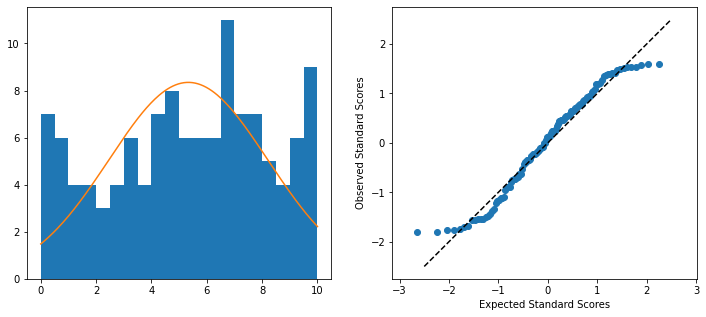

In [59]:
# generate the data
np.random.seed(8322489)

n_points = 120
unif_data = np.random.uniform(0, 10, n_points)

# set up the figure
plt.figure(figsize = [12, 5])

# left subplot: plot the data
plt.subplot(1, 2, 1)
bin_size = 0.5
bin_edges = np.arange(0, 10 + bin_size, bin_size)
plt.hist(x = unif_data, bins = bin_edges);

# overlay a theoretical normal distribution on top
samp_mean = unif_data.mean()
samp_sd = unif_data.std()

from scipy.stats import norm
x = np.linspace(0, 10, 200)
y = norm.pdf(x, samp_mean, samp_sd) # normal distribution heights
y *= n_points * bin_size # scale the distribution height
plt.plot(x, y)

# right subplot: create a Q-Q plot
plt.subplot(1, 2, 2)

qs = (np.arange(n_points) - .5) / n_points
expected_scores = norm.ppf(qs)
data_scores = (np.sort(unif_data) - samp_mean) / samp_sd

plt.scatter(expected_scores, data_scores);
plt.plot([-2.5,2.5],[-2.5,2.5],'--', color = 'black');
plt.axis('equal');
plt.xlabel('Expected Standard Scores');
plt.ylabel('Observed Standard Scores');

When we compare the random standardized scores drawn from the uniform distribution to the expected scores from the theoretical normal distribution in the Q-Q plot, we see an S-shaped curve. The comparison of values in the middle of the curve are approximately linear in trend, but the slope is steeper than the desired y = x. Meanwhile on the edges, the slope is extremely shallow, as the uniform distribution is fixed to a finite range, but the normal distribution values in the tails are expected to be much further away. You can somewhat see this in the superimposed distribution line in the left-side plot, where even at the edges of the data, there is still quite a bit of height to the theoretical normal curve. All of this contributes to the result that the randomly-generated uniform data can't be well-approximated by the normal distribution.

#### Swarm Plots

In this lesson, you saw many ways of depicting the relationship between a numeric variable and a categorical variable. Violin plots depicted distributions as density curves, while box plots took a more summary approach, plotting the quantiles as boxes with whiskers. Another alternative to these plots is the swarm plot. Similar to a scatterplot, each data point is plotted with position according to its value on the two variables being plotted. Instead of randomly jittering points as in a normal scatterplot, points are placed as close to their actual value as possible without allowing any overlap. A swarm plot can be created in seaborn using the swarmplot function, similar to how you would a call violinplot or boxplot.

NameError: name 'df' is not defined

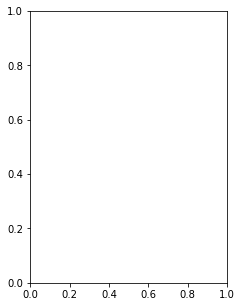

In [60]:
plt.figure(figsize = [12, 5])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 3, 1)
ax1 = sb.violinplot(data = df, x = 'cat_var', y = 'num_var', color = base_color)

# center plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data = df, x = 'cat_var', y = 'num_var', color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

# right plot: swarm plot
plt.subplot(1, 3, 3)
sb.swarmplot(data = df, x = 'cat_var', y = 'num_var', color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

Looking at the plots side by side, you can see relative pros and cons of the swarm plot. Unlike the violin plot and box plot, every point is plotted, so we can now compare the frequency of each group in the same plot. While there is some distortion due to location jitter, we also have a more concrete picture of where the points actually lie, removing the long tails that can be present in violin plots.

However, it is only reasonable to use a swarm plot if we have a small or moderate amount of data. If we have too many points, then the restrictions against overlap will cause too much distortion or require a lot of space to plot the data comfortably. In addition, having too many points can actually be a distraction, making it harder to see the key signals in the visualization. Use your findings from univariate visualizations to inform which bivariate visualizations will be best, or simply experiment with different plot types to see what is most informative.

#### Rug Plot

You might encounter, or be interested in, marginal distributions that are plotted alongside bivariate plots such as scatterplots. A marginal distribution is simply the univariate distribution of a variable, ignoring the values of any other variable. For quantitative data, histograms or density curves are fine choices for marginal plot, but you might also see the rug plot employed. In a rug plot, all of the data points are plotted on a single axis, one tick mark or line for each one. Compared to a marginal histogram, the rug plot suffers somewhat in terms of readability of the distribution, but it is more compact in its representation of the data.

Seaborn's JointGrid class enables this plotting of bivariate relationship with marginal univariate plots for numeric data. The plot_joint method specifies a plotting function for the main, joint plot for the two variables, while the plot_marginals method specifies the plotting function for the two marginal plots. Here, we make use of seaborn's rugplot function.

In [62]:
g = sb.JointGrid(data = df, x = 'num_var1', y = 'num_var2')
g.plot_joint(plt.scatter)
g.plot_marginals(sb.rugplot, height = 0.25)

NameError: name 'df' is not defined

The rug plot is fine here since the data isn't particularly numerous or overly dense. In other circumstances, a histogram or density curve will be more appropriate. You probably won't consider the rug plot as a primary plot choice, but it can be a good supporter plot in certain circumstances.

#### Ridgeline Plot

One of the hot new visualization types from recent years is the ridgeline plot. In a nutshell, the ridgeline plot is a series of vertically faceted line plots or density curves, but with somewhat overlapping y-axes. This can be thought of as a contrast to the line plot variation seen in the "Line Plots" part of the lesson, where multiple lines were plotted on the same axes, with different hues. On this page, I'll walk through the creation of a ridgeline plot using some of the demonstration data shown in the "Faceting" page:

In [63]:
group_means = df.groupby(['many_cat_var']).mean()
group_order = group_means.sort_values(['num_var'], ascending = False).index

g = sb.FacetGrid(data = df, col = 'many_cat_var', col_wrap = 5, size = 2,
                 col_order = group_order)
g.map(plt.hist, 'num_var', bins = np.arange(5, 15+1, 1))
g.set_titles('{col_name}')

NameError: name 'df' is not defined

Two things immediately come to mind for changing the faceted histograms into a ridgeline plot. First of all, changing the form of the distribution plots from histograms to kernel density estimates (as seen in the Extras of the previous lesson) will make the overlaps a bit smoother. Second, we need to facet the levels by rows so that they're all stacked up on top of one another.

In [64]:
group_means = df.groupby(['many_cat_var']).mean()
group_order = group_means.sort_values(['num_var'], ascending = False).index

g = sb.FacetGrid(data = df, row = 'many_cat_var', size = 0.75, aspect = 7,
                 row_order = group_order)
g.map(sb.kdeplot, 'num_var', shade = True)
g.set_titles('{row_name}')

NameError: name 'df' is not defined

FacetGrid and set_titles change "col" to "row", also removing "col_wrap". The "size" and "aspect" dimensions have also been adjusted for the large vertical stacking of facets. The map function changes to kdeplot and removes "bins", adding the "shade" parameter in its place.

Now we've got all of the group distributions stacked on top of one another for a uni-dimensional comparison, but the plot's still pretty tall. Next, we'll create some overlap between the individual subplots.

In [65]:
group_means = df.groupby(['many_cat_var']).mean()
group_order = group_means.sort_values(['num_var'], ascending = False).index

# adjust the spacing of subplots with gridspec_kws
g = sb.FacetGrid(data = df, row = 'many_cat_var', size = 0.5, aspect = 12,
                 row_order = group_order, gridspec_kws = {'hspace' : -0.2})
g.map(sb.kdeplot, 'num_var', shade = True)

# remove the y-axes
g.set(yticks=[])
g.despine(left=True)

g.set_titles('{row_name}')

NameError: name 'df' is not defined

I've added the "gridspec_kws" parameter to the FacetGrid call to adjust the arrangement of subplots in the grid through Matplotlib's GridSpec class. By setting "hspec" to a negative value, the subplot axes bounds will overlap vertically. The "size" and "aspect" parameters have also been adjusted. While I'm at it, I'll add some code on the FacetGrid object to remove the y-axis through the despine method and remove the ticks through the set method. They're going to start overlapping, and we don't really need them – we're mostly interested in the relative positions of the distributions rather than specific heights.

I've added the "gridspec_kws" parameter to the FacetGrid call to adjust the arrangement of subplots in the grid through Matplotlib's GridSpec class. By setting "hspec" to a negative value, the subplot axes bounds will overlap vertically. The "size" and "aspect" parameters have also been adjusted. While I'm at it, I'll add some code on the FacetGrid object to remove the y-axis through the despine method and remove the ticks through the set method. They're going to start overlapping, and we don't really need them – we're mostly interested in the relative positions of the distributions rather than specific heights.



In [66]:
group_means = df.groupby(['many_cat_var']).mean()
group_order = group_means.sort_values(['num_var'], ascending = False).index

g = sb.FacetGrid(data = df, row = 'many_cat_var', size = 0.5, aspect = 12,
                 row_order = group_order, gridspec_kws = {'hspace' : -0.2})
g.map(sb.kdeplot, 'num_var', shade = True)

g.set(yticks=[])
g.despine(left=True)

# set the transparency of each subplot to full
g.map(lambda **kwargs: plt.gca().patch.set_alpha(0))

# remove subplot titles and write in new labels
def label_text(x, **kwargs):
    plt.text(4, 0.02, x.iloc[0], ha = 'center', va = 'bottom')
g.map(label_text, 'many_cat_var')
g.set_xlabels('num_var')
g.set_titles('')

NameError: name 'df' is not defined

We make clever use of the FacetGrid object's map function to perform the plot modifications. Previously, you've seen map used where the first argument is a plotting function, the following arguments are positional variable strings, and any additional arguments are keyword arguments for the plotting function. In actuality, you can set any function as the first argument, which will be applied to each facet. To apply the transparency using map, I set up an anonymous lambda function that gets the current Axes (gca), selects its background (patch), and sets its transparency to full.

As for the second map argument, it sends a pandas Series to the function specified by the first argument. This Series is filtered to include only the column specified by the second map argument, with only the rows appropriate for each facet. In this case, I exploit the fact that the 'many_cat_var' column is filled with copies of the categorical feature string to specify the text string, with hardcoded positional values appropriate to the plot. (map also sends a few general keyword arguments like 'color' automatically to the specified function, hence the need for **kwargs to capture them despite not specifying any myself.) One downside to this approach is that the x-axis labels get replaced with 'many_cat_var' after the map call, thus requiring the addition of a set_xlabels function call to reset the string.

The final ridgeline plot looks like this, where we can see the distribution of our numeric variable on each category, sorted by mean:

C:\Users\heloi\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)
C:\Users\heloi\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


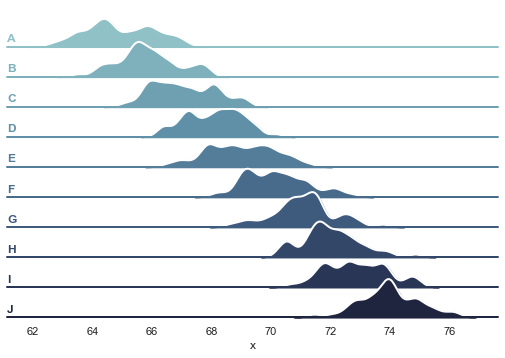

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal);

# Draw the densities in a few steps
g.map(sns.kdeplot, "x",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25);

# Remove axes details that don't play well with overlap
g.set_titles("");
g.set(yticks=[], ylabel="");
g.despine(bottom=True, left=True);

### Multivariate Exploration of Data

#### Non-Positional Encodings for Third Variables

There are four major cases to consider when we want to plot three variables together:

* three numeric variables
* two numeric variables and one categorical variable
* one numeric variable and two categorical variables
* three categorical variables

If we have at least two numeric variables, as in the first two cases, one common method for depicting the data is by using a scatterplot to encode two of the numeric variables, then using a non-positional encoding on the points to convey the value on the third variable, whether numeric or categorical. (You will see additional techniques later in the lesson that can also be applied to the other two cases, i.e. where we have at least two categorical variables.)

Three main non-positional encodings stand out: shape, size, and color. For Matplotlib and Seaborn, color is the easiest of these three encodings to apply for a third variable. Color can be used to encode both qualitative and quantitative data, with different types of color palettes used for different use cases. Because of how broadly color can be used, a dedicated discussion of color and its use in Matplotlib and Seaborn will be deferred to the next page in the lesson.

##### Encoding via Shape

Shape is a good encoding for categorical variables, using one shape for each level of the categorical variable. Unfortunately, there is no built-in way to automatically assign different shapes in a single call of the scatter or regplot function. Instead, we need to write a loop to call our plotting function multiple times, isolating data points by categorical level and setting a different "marker" argument value for each one.

In [ ]:
cat_markers = [['A', 'o'],
               ['B', 's']]

for cat, marker in cat_markers:
    df_cat = df[df['cat_var1'] == cat]
    plt.scatter(data = df_cat, x = 'num_var1', y = 'num_var2', marker = marker)
plt.legend(['A','B'])

The 'o' string specifies circular markers for members of category 'A', while the 's' string specifies square markers for members of category 'B'. The legend function adds a legend to the plot, with one marker for every scatter call made. The function argument sets the labels for those points.

From the positional encodings in the plot, you can see that there is a modest positive relationship between the two numeric variables. Adding the categorical variable via shape encoding, we can see that points of category 'A' tend to be smaller than those of category 'B' in terms of the numeric x-variable ("num_var1"). Neither category seems to have an advantage in terms of variability or value for the numeric y-variable ("num_var2").

Note that the two categories have automatically been double-encoded with different colors, in addition to the explicitly specified markers. If we wanted the points to have the same color as well, we could do that through the "c" parameter in scatter or "color" in regplot. A small example of where this is useful will be seen in the next section.

##### Encoding via Size

Point size is a good encoding for numeric variables. Usually, we want the numeric values to be proportional to the area of the point markers; this is the default functionality of the "s" parameter in scatter. (You need to refer to "s" through a dictionary assigned to the "scatter_kws" parameter when working with regplot.)

While the creation of the plot is easier with size, we need to put in extra leg work to create a legend. Since, as noted above, legend will only create one legend entry per plot function call, we need to create additional dummy scatter objects with reference sizes to create the plot. The color is fixed so that all of the legend entries have the same color, and two arguments are provided to the legend function: the list of plotting objects to depict in the legend, and their labels.

The size encoding for the third numeric variable ("num_var3") shows that its values are largest in the 'middle' of the distribution of values, and smaller on the upper and bottom edges. It is also clear that size is much less precise an encoding than position, so it is better used to make general, qualitative judgments than precise judgments.

In the case of the example, the data was also scaled in a way that the marker sizes made sense as given. You might need to apply a scaling factor (e.g., multiplying or dividing all values by 2) or shift in order to make the size encoding interpretable. In particular, if the values in your third numeric variable include negative values, then you might want to choose a color encoding instead.

In [ ]:
plt.scatter(data = df, x = 'num_var1', y = 'num_var2', s = 'num_var3')

# dummy series for adding legend
sizes = [20, 35, 50]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s, color = base_color))
plt.legend(legend_obj, sizes)

It might seem plausible to combine both size and shape encodings into the same plot, to depict the trend in four variables at once. Technically, this may be true, but there are some cautions to be taken with this approach. One surface issue is that the code to depict the plot and a reasonable legend gets complicated. A more important issue is that point areas won't all be the same even with the same value, depending on the shape of the marker:

##### Encoding via Color

Color is a very common encoding for variables, for both qualitative and quantitative variables. You've already seen this employed in previous lessons where position could not be used to encode a value: color for category in a clustered bar chart, and color for count in a heat map (both as a 2-d histogram and as a 2-d bar chart). Here, we'll look at how to employ color in scatterplots, as well as discuss more about color palette choices depending on the type of data you have.

If you have a qualitative variable, you can set different colors for different levels of a categorical variable through the "hue" parameter on seaborn's FacetGrid class.

In [ ]:
g = sb.FacetGrid(data = df, hue = 'cat_var1', size = 5)
g.map(plt.scatter, 'num_var1', 'num_var2')
g.add_legend()

We get a plot that is similar to what was observed in the previous page: points of category A tend to be smaller than category B on "num_var1" for the x-axis, and there doesn't appear to be any interaction with "num_var2" as depicted on the y-axis.

For quantitative variables, we should not take the same approach, since FacetGrid expects any variable input for subsetting to be categorical. Instead, we can set color based on numeric value in the scatter function through the "c" parameter, much like how we set up marker sizes through "s". (Unlike with size, we don't have an easy way of setting color by numeric value through regplot due to how its "color" argument is set up.)

In [ ]:
plt.scatter(data = df, x = 'num_var1', y = 'num_var2', c = 'num_var3')
plt.colorbar()

As we saw before, when points lie further away from the central line through the data, the value on the third variable decreases. Compared to the size encoding, we have a more precise idea of value on the third variable, though certainly not as precise as positional encodings.

#### Color Palettes

Depending on the type of data you have, you may want to change the type of color palette that you use to depict your data. There are three major classes of color palette to consider: qualitative, sequential, and diverging.

Qualitative palettes are built for nominal-type data. This is the palette class taken by the default palette.

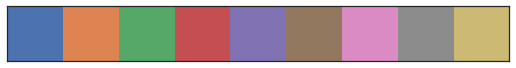

In [72]:
sb.palplot(sb.color_palette(n_colors=9))

In a qualitative palette, consecutive color values are distinct so that there is no inherent ordering of levels implied. Colors in a good qualitative palette should also try and avoid drastic changes in brightness and saturation that would cause a reader to interpret one category as being more important than the others - unless that emphasis is deliberate and purposeful.

For other types of data (ordinal and numeric), a choice may need to be made between a sequential scale and a diverging scale. In a sequential palette, consecutive color values should follow each other systematically. Typically, this follows a light-to-dark trend across a single or small range of hues, where light colors indicate low values and dark colors indicate high values. The default sequential color map, "viridis", takes the opposite approach, with dark colors indicating low values, and light values indicating high.

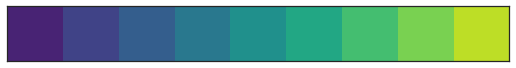

In [73]:
sb.palplot(sb.color_palette('viridis', 9))

Most of the time, a sequential palette will depict ordinal or numeric data just fine. However, if there is a meaningful zero or center value for the variable, you may want to consider using a diverging palette. In a diverging palette, two sequential palettes with different hues are put back to back, with a common color (usually white or gray) connecting them. One hue indicates values greater than the center point, while the other indicates values smaller than the center.

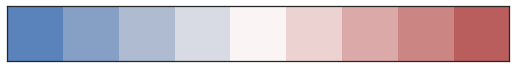

In [74]:
sb.palplot(sb.color_palette('vlag', 9))

If you want to change the color map for your plot, the easiest way of doing so is by using one of the built-ins from Matplotlib or Seaborn. This part of the Matplotlib documentation has a list of strings that can be understood for color mappings. For most of your purposes, stick with the palettes noted in the top few tables as built-in for Matplotlib ('viridis', etc.) or from ColorBrewer; the remaining palettes may not be as perceptually consistent. Seaborn also adds in a number of its own palettes:

Qualitative (all up to 6 colors): 'deep', 'pastel', 'dark', 'muted', 'bright', 'colorblind'
Sequential: 'rocket' (white-orange-red-purple-black), 'mako' (mint-green-blue-purple-black)
Diverging: 'vlag' (blue-white-red), 'icefire' (blue-black-orange)
For all of these strings, appending '_r' reverses the palette, which is useful if a sequential or diverging palette is rendered counter to your expectations.

A color palette can be set in FacetGrid through the "palette" parameter, and in scatter through the "cmap" parameter.

In [75]:
g = sb.FacetGrid(data = df, hue = 'cat_var1', size = 5,
                 palette = 'colorblind')
g.map(plt.scatter, 'num_var1', 'num_var2')
g.add_legend()

C:\Users\heloi\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


KeyError: 'cat_var1'

In [ ]:
plt.scatter(data = df, x = 'num_var1', y = 'num_var2', c = 'num_var3',
            cmap = 'mako_r')
plt.colorbar()

When using a diverging color palette, you will likely need to specify the "vmin" and "vmax" parameters in order to have the neutral point in the palette meet the center point in the scale. Alternatively, solutions that create a different normalization function like the one posted in this Stack Overflow thread can be used for finer control over the color map. Diverging color scales are common enough for the heatmap type that there is a "center" parameter for setting the central value. You'll see a demonstration of this later in the lesson ("Plot Matrices").

When creating the plot, I made the figure size bigger and set axis limits to zoom into the majority of data points. I might want to apply some manual jitter to the data since I suspect there to be a lot of overlapping points. From the plot as given, I see a slight increase in speed as both defense and special defense increase. However, the brightest points seem to be clumped up in the center in the 60-80 defense and special defense ranges with the two brightest points on the lower left of the diagonal.


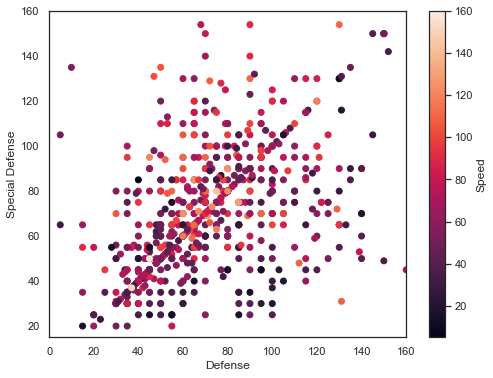

In [80]:
sol_string = ["When creating the plot, I made the figure size bigger and set",
                  "axis limits to zoom into the majority of data points. I might",
                  "want to apply some manual jitter to the data since I suspect",
                  "there to be a lot of overlapping points. From the plot as given,",
                  "I see a slight increase in speed as both defense and special",
                  "defense increase. However, the brightest points seem to be clumped",
                  "up in the center in the 60-80 defense and special defense ranges",
                  "with the two brightest points on the lower left of the diagonal."]
print((" ").join(sol_string))

# data setup
pokemon = pd.read_csv('pokemon.csv')

# plotting
plt.figure(figsize = [8,6])
plt.scatter(data = pokemon, x = 'defense', y = 'special-defense',
                c = 'speed');
plt.colorbar(label = 'Speed')
plt.xlim(0,160)
plt.ylim(15,160)
plt.xlabel('Defense');
plt.ylabel('Special Defense');

After subsetting the data, I used FacetGrid to set up and generate the plot. I used the .set() method for FacetGrid objects to set the x-scaling and tick marks. The plot shows the drastic difference in sizes and weights for the Fairy and Dragon Pokemon types.


C:\Users\heloi\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


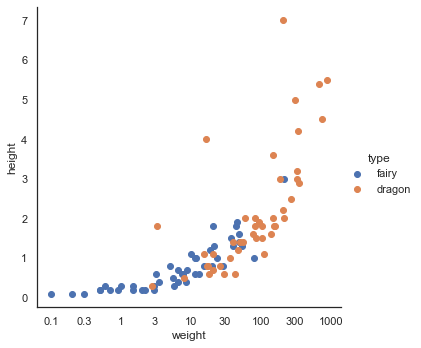

In [85]:
sol_string = ["After subsetting the data, I used FacetGrid to set up and",
                  "generate the plot. I used the .set() method for FacetGrid",
                  "objects to set the x-scaling and tick marks. The plot shows",
                  "the drastic difference in sizes and weights for the Fairy",
                  "and Dragon Pokemon types."]
print((" ").join(sol_string))

# data setup
pokemon = pd.read_csv('pokemon.csv')
type_cols = ['type_1','type_2']
non_type_cols = pokemon.columns.difference(type_cols)
pkmn_types = pokemon.melt(id_vars = non_type_cols, value_vars = type_cols, 
                              var_name = 'type_level', value_name = 'type').dropna()

pokemon_sub = pkmn_types.loc[pkmn_types['type'].isin(['fairy','dragon'])]

# plotting
g = sb.FacetGrid(data = pokemon_sub, hue = 'type', size = 5);
g.map(plt.scatter, 'weight','height')
g.set(xscale = 'log') # need to set scaling before customizing ticks
x_ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
g.set(xticks = x_ticks, xticklabels = x_ticks)
g.add_legend();

#### Faceting in Two Directions

You saw how FacetGrid could be used to subset your dataset across levels of a categorical variable, and then create one plot for each subset. Where the faceted plots demonstrated were univariate before, you can actually use any plot type, allowing you to facet bivariate plots to create a multivariate visualization.

In [86]:
g = sb.FacetGrid(data = df, col = 'cat_var1', size = 4)
g.map(sb.boxplot, 'cat_var2', 'num_var2')

C:\Users\heloi\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


KeyError: 'cat_var1'

The faceted box plot suggests a slight interaction between the two categorical variables, where, in level B of "cat_var1", the level of "cat_var2" seems to be have a larger effect on the value of "num_var2", compared to the trend within "cat_var1" level A.

FacetGrid also allows for faceting a variable not just by columns, but also by rows. We can set one categorical variable on each of the two facet axes for one additional method of depicting multivariate trends.


In [87]:
g = sb.FacetGrid(data = df, col = 'cat_var2', row = 'cat_var1', size = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'num_var1', 'num_var2')

KeyError: 'cat_var1'

Setting margin_titles = True means that instead of each facet being labeled with the combination of row and column variable, labels are placed separately on the top and right margins of the facet grid. This is a boon, since the default plot titles are usually too long.

#### Other Adaptations of Bivariate Plots

You also saw one other way of expanding univariate plots into bivariate plots in the previous lesson: substituting count on a bar chart or histogram for the mean, median, or some other statistic of a second variable. This adaptation can also be done for bivariate plots like the heat map, clustered bar chart, and line plot, to allow them to depict multivariate relationships.

If we want to depict the mean of a third variable in a 2-d histogram, we need to change the weights of points in the hist2d function similar to how we changed the weights in the 1-d histogram.

In [88]:
xbin_edges = np.arange(0.25, df['num_var1'].max()+0.5, 0.5)
ybin_edges = np.arange(7,    df['num_var2'].max()+0.5, 0.5)

# count number of points in each bin
xbin_idxs = pd.cut(df['num_var1'], xbin_edges, right = False,
                    include_lowest = True, labels = False).astype(int)
ybin_idxs = pd.cut(df['num_var2'], ybin_edges, right = False,
                    include_lowest = True, labels = False).astype(int)

pts_per_bin = df.groupby([xbin_idxs, ybin_idxs]).size()
pts_per_bin = pts_per_bin.reset_index()
pts_per_bin = pts_per_bin.pivot(index = 'num_var1', columns = 'num_var2').values

z_wts = df['num_var3'] / pts_per_bin[xbin_idxs, ybin_idxs]

# plot the data using the calculated weights
plt.hist2d(data = df, x = 'num_var1', y = 'num_var2', weights = z_wts,
           bins = [xbin_edges, ybin_edges], cmap = 'viridis_r', cmin = 0.5);
plt.xlabel('num_var1')
plt.ylabel('num_var2');
plt.colorbar(label = 'mean(num_var3)');

KeyError: 'num_var1'

Considering how few data points there are in the example, and how cleanly the third variable is distributed, the adapted heat map is a bit excessive in terms of work. The low level of point overlap observed earlier means that the scatterplot with color or size encoding was sufficient for depicting the data. You'll be more likely to use the heat map if there is a lot of data to be aggregated.

The code for the 2-d bar chart doesn't actually change much. The actual heatmap call is still the same, only the aggregation of values changes. Instead of taking size after the groupby operation, we compute the mean across dataframe columns and isolate the column of interest.

In [89]:
cat_means = df.groupby(['cat_var1', 'cat_var2']).mean()['num_var2']
cat_means = cat_means.reset_index(name = 'num_var2_avg')
cat_means = cat_means.pivot(index = 'cat_var2', columns = 'cat_var1',
                            values = 'num_var2_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(num_var2)'})

KeyError: 'cat_var1'

An alternative approach for two categorical variables and one numeric variable is to adapt a clustered bar chart using the barplot function instead of the countplot function:

In [90]:
ax = sb.barplot(data = df, x = 'cat_var1', y = 'num_var2', hue = 'cat_var2')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'cat_var2')

ValueError: Could not interpret input 'cat_var1'

The "hue" parameter can also be used in a similar fashion in the boxplot, violinplot, and pointplot functions to add a categorical third variable to those plots in a clustered fashion. As a special note for pointplot, the default rendering aligns all levels of the "hue" categorical variable vertically. Use the "dodge" parameter to shift the levels in a clustered fashion:

In [ ]:
ax = sb.pointplot(data = df, x = 'cat_var1', y = 'num_var2', hue = 'cat_var2',
                  dodge = 0.3, linestyles = "")

As a final example, a line plot can be adapted from previous code showing how to create frequency polygons for levels of a categorical variable. In this case as well, we create a custom function to send to a FacetGrid object's map function that computes the means in each bin, then plots them as lines via errorbar.

In [ ]:
def mean_poly(x, y, bins = 10, **kwargs):
    """ Custom adapted line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    means = y.groupby(data_bins).mean()

    # create plot
    plt.errorbar(x = bin_centers, y = means, **kwargs)

bin_edges = np.arange(0.25, df['num_var1'].max()+0.5, 0.5)
g = sb.FacetGrid(data = df, hue = 'cat_var2', size = 5)
g.map(mean_poly, "num_var1", "num_var2", bins = bin_edges)
g.set_ylabels('mean(num_var2)')
g.add_legend()

Due to overplotting, I've taken a faceting approach to this task. There don't seem to be any obvious differences in the main cluster across vehicle classes, except that the minicompact and large sedans' arcs are thinner than the other classes due to lower counts. The faceted plots clearly show that most of the high-efficiency cars are in the mid-size and compact car classes.


C:\Users\heloi\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


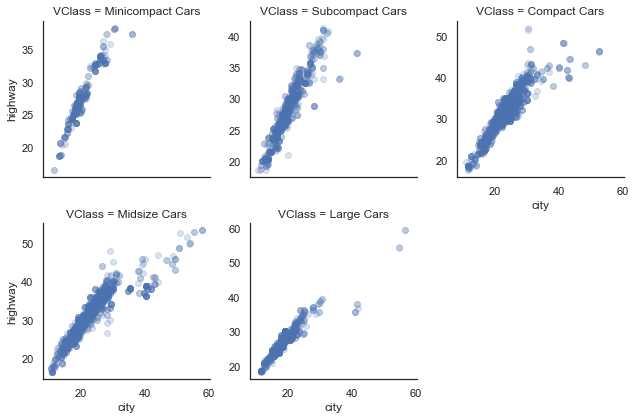

In [95]:
sol_string = ["Due to overplotting, I've taken a faceting approach to this task.",
                  "There don't seem to be any obvious differences in the main cluster",
                  "across vehicle classes, except that the minicompact and large",
                  "sedans' arcs are thinner than the other classes due to lower",
                  "counts. The faceted plots clearly show that most of the high-efficiency",
                  "cars are in the mid-size and compact car classes."]
print((" ").join(sol_string))

# data setup
fuel_econ = pd.read_csv('fuel-econ.csv')

sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
    fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)
else: # compatibility for v.20
    fuel_econ['VClass'] = fuel_econ['VClass'].astype('category', ordered = True,
                                                         categories = sedan_classes)

# plotting
g = sb.FacetGrid(data = fuel_econ, col = 'VClass', size = 3, col_wrap = 3, sharey = False)
g.map(plt.scatter, 'city', 'highway', alpha = 1/5);

Due to the high number of data points and their high amount of overlap, I've chosen to plot the data in a faceted plot. You can see that engine sizes are smaller for cars that use regular gasoline against those that use premium gas. Most cars fall in an emissions band a bit below 9 kg CO2 per gallon; diesel cars are consistently higher, a little above 10 kg CO2 per gallon. This makes sense, since a gallon of gas gets burned no matter how efficient the process. More strikingly, there's a smattering of points with much smaller emissions. If you inspect these points more closely you'll see that they represent hybrid cars that use battery energy in addition to conventional fuel! To pull these mechanically out of the dataset requires more data than that which was trimmed to create it - and additional research to understand why these points don't fit the normal CO2 bands.


C:\Users\heloi\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


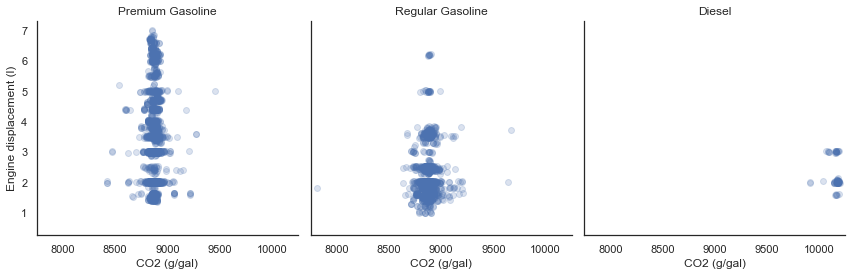

In [118]:
sol_string = ["Due to the high number of data points and their high amount of overlap,",
                  "I've chosen to plot the data in a faceted plot. You can see that engine",
                  "sizes are smaller for cars that use regular gasoline against those that",
                  "use premium gas. Most cars fall in an emissions band a bit below 9 kg CO2",
                  "per gallon; diesel cars are consistently higher, a little above 10 kg CO2",
                  "per gallon. This makes sense, since a gallon of gas gets burned no matter",
                  "how efficient the process. More strikingly, there's a smattering of points",
                  "with much smaller emissions. If you inspect these points more closely you'll",
                  "see that they represent hybrid cars that use battery energy in addition to",
                  "conventional fuel! To pull these mechanically out of the dataset requires",
                  "more data than that which was trimmed to create it - and additional research",
                  "to understand why these points don't fit the normal CO2 bands."]
print((" ").join(sol_string))

# data setup
fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ['co2_gal'] = fuel_econ['comb'] * fuel_econ['co2']
fuel_econ_sub = fuel_econ.loc[fuel_econ['fuelType'].isin(['Premium Gasoline', 'Regular Gasoline', 'Diesel'])]

# plotting
g = sb.FacetGrid(data = fuel_econ_sub, col = 'fuelType', size = 4,
                     col_wrap = 3)
g.map(sb.regplot, 'co2_gal', 'displ', y_jitter = 0.04, fit_reg = False,
          scatter_kws = {'alpha' : 1/5})
g.set_ylabels('Engine displacement (l)')
g.set_xlabels('CO2 (g/gal)')
g.set(xlim=(7750, 10250))
x_ticks = [8000, 8500, 9000, 9500, 10000]
g.set(xticks = x_ticks, xticklabels = x_ticks)
g.set_titles('{col_name}');

#### Plot Matrices

To move back to bivariate exploration for a bit, you might come out of your initial univariate investigation of the data wanting to look at the relationship between many pairs of variables. Rather than generate these bivariate plots one by one, a preliminary option you might consider for exploration is the creation of a plot matrix. In a plot matrix, a matrix of plots is generated. Each row and column represents a different variable, and a subplot against those variables is generated in each plot matrix cell. This contrasts with faceting, where rows and columns will subset the data, and the same variables are depicted in each subplot.

g = sb.PairGrid(data = df, vars = ['num_var1', 'num_var2', 'num_var3'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

By default, PairGrid only expects to depict numeric variables; a typical invocation of PairGrid plots the same variables on the horizontal and vertical axes. On the diagonals, where the row and column variables match, a histogram is plotted. Off the diagonals, a scatterplot between the two variables is created.

The pairplot function can also be used to render this common use case in a single call.

For other relationships, the flexibility of PairGrid shines. For example, if we want to look at the relationship between the numeric and categorical variables in the data, we need to set the different variable types on the rows and columns, then use an appropriate plot type for all matrix cells

KeyError: "None of [Index(['num_var1', 'cat_var1'], dtype='object')] are in the [columns]"

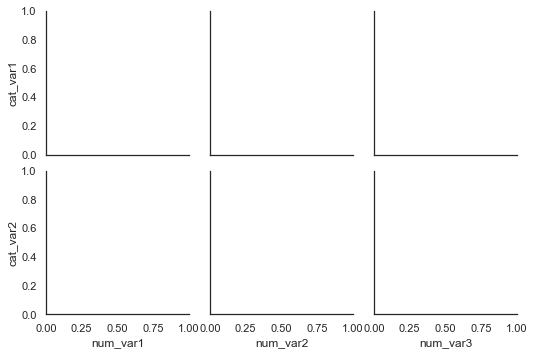

In [120]:
g = sb.PairGrid(data = df, x_vars = ['num_var1', 'num_var2', 'num_var3'],
                y_vars = ['cat_var1','cat_var2'])
g.map(sb.violinplot, inner = 'quartile')

When you choose to create a plot matrix, be aware that the time it takes to render the plot depends on the number of data points you have and the number of variables you want to plot. Increasing the number of variables increases the number of plots that need to be rendered in a quadratic fashion. In addition, increasing the number of variables means that the individual subplot size needs to be reduced in order to fit the matrix width on your screen. That means that, if you have a lot of data, it might be difficult to see the relationships between variables due to overplotting, and it will take a long time to complete. One recommended approach is to take a random subset of the data to plot in the plot matrix instead. Use the plot matrix to identify interesting variable pairs, and then follow it up with individual plots on the full data.

I set up my PairGrid to plot scatterplots off the diagonal and histograms on the diagonal. The intersections where 'co2' meets the fuel mileage measures are fairly interesting in how tight the curves are. You'll explore this more in the next task.


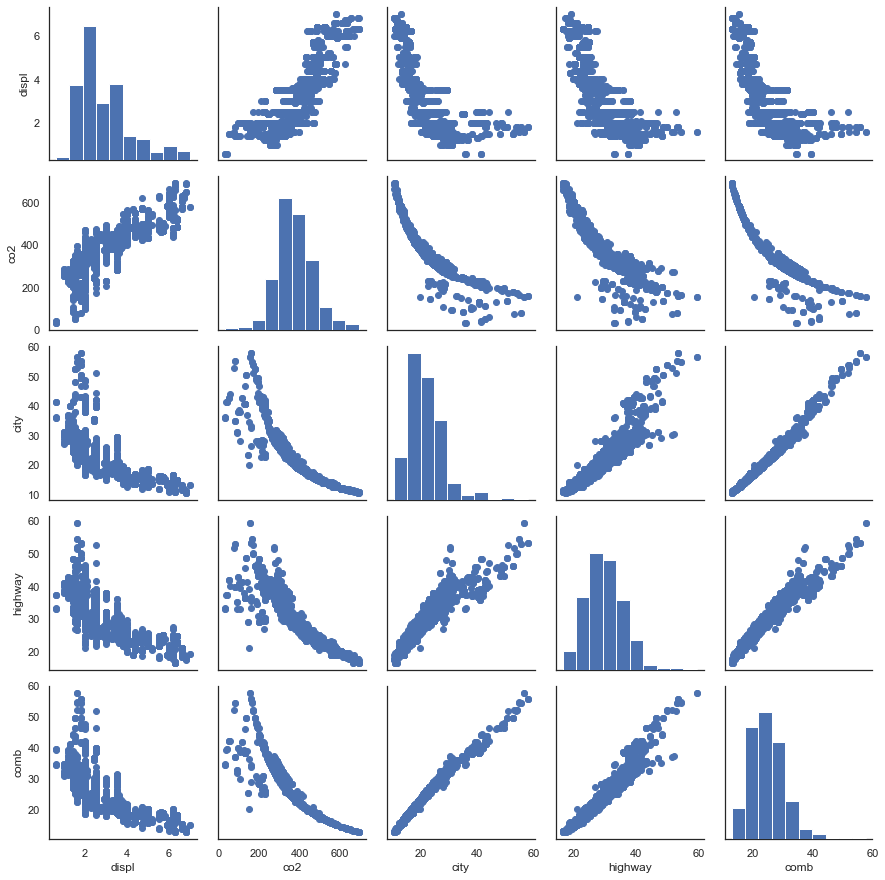

In [97]:
    sol_string = ["I set up my PairGrid to plot scatterplots off the diagonal",
                  "and histograms on the diagonal. The intersections where 'co2'",
                  "meets the fuel mileage measures are fairly interesting in how",
                  "tight the curves are. You'll explore this more in the next task."]
    print((" ").join(sol_string))

    # data setup
    fuel_econ = pd.read_csv('fuel-econ.csv')

    # plotting
    g = sb.PairGrid(data = fuel_econ, vars = ['displ', 'co2', 'city', 'highway', 'comb'])
    g.map_diag(plt.hist)
    g.map_offdiag(plt.scatter);

#### Correlation Matrices

For numeric variables, it can be useful to create a correlation matrix as part of your exploration. While it's true that the .corr function is perfectly fine for computing and returning a matrix of correlation coefficients, it's not too much trouble to plot the matrix as a heat map to make it easier to see the strength of the relationships.

<AxesSubplot:>

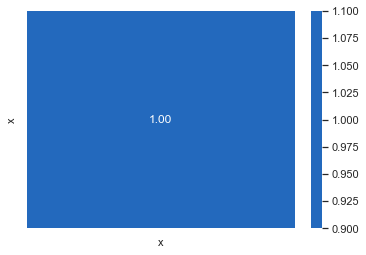

In [123]:
sb.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)

Instead of using the default sequential color map, a diverging color map is specified and its center is set to 0. That way, we can use hue to tell if a correlation is positive or negative, and see its strength from the hue's intensity.

on't forget that correlations are computed based on strength of linear relationship. Compare the correlation between "num_var2" and "num_var3" to the corresponding cell in the first plot matrix as an example of how a correlation statistic might be misleading.

#### Feature Engineering

This is not so much an additional technique for adding variables to your plot, but a reminder that feature engineering is a tool that you can leverage as you explore and learn about your data. As you explore a dataset, you might find that two variables are related in some way. Feature engineering is all about creating a new variable with a sum, difference, product, or ratio between those original variables that may lend a better insight into the research questions you seek to answer.

For example, if you have one variable that gives a count of crime incidents, and a second one that gives population totals, then you may want to engineer a new variable by dividing the former by the latter, obtaining an incident rate. This would account for a possible relationship between the original features where if there are more people, there might naturally be more chances for crimes to occur. If we looked at the raw counts rather than the incident rate, we risk just seeing information about population sizes rather than what we might really want.

Another way that you can perform feature engineering is to use the cut function to divide a numeric variable into ordered bins. When we split a numeric variable into ordinal bins, it opens it up to more visual encodings. For example, we might facet plots by bins of a numeric variable, or use discrete color bins rather than a continuous color scale. This kind of discretization step might help in storytelling by clearing up noise, allowing the reader to concentrate on major trends in the data. Of course, the bins might also mislead if they're spaced improperly – check out this PolicyViz post if you'd like to see a deeper discussion in the context of map-based visualizations.

By now, you've seen a lot of ways of expanding the number of variables that can be depicted in a single visualization. The basic positional axes can handle two variables: one on the horizontal and one on the vertical. You can facet by both columns and rows to add up to two variables. Encodings in shape, size, and color could add as many as three more. However, you should try and resist the temptation to overuse your newfound power, and to instead practice some restraint in the number of variables that you include in any one plot.

When you have only two variables plotted, A and B, you have only one relationship to understand. Add in a third variable C, and you have three pairwise relationships: A vs. B, A vs. C, and B vs. C. You also need to consider one interaction effect between all three variables: Does the value of C affect the relationship between A and B? With a fourth variable, you have six possible pairwise relationships and four different three-variable interaction effects. This exponential explosion of possible relationships with the number of variables means that there is a potential for cognitive overload if the data isn't conveyed clearly.

This is why it is so important to approach data exploration systematically, rather than just throw as many variables together as possible immediately. When you move from univariate visualizations to bivariate visualizations, you augment your previous understanding of individual distributions by seeing how they relate to one another. If you look at pairwise visualizations before putting together a trivariate plot, then you will have a clear view to how the interaction, if present, changes your previous understanding of the marginal pairwise relationship.

When you move on to explanatory data visualizations, try to limit the number of variables that are introduced at the same time and make sure that the encoding choices convey the main findings to your reader in the clearest way possible. While it's good to keep a soft limit of about three or four variables in a single visualization, you can exceed this if the trends are clear or you introduce features to your reader in a systematic way.

### Explanatory Visualizations

#### Revisiting the Data Analysis Process

As a reminder, let's briefly review the data analysis process and revisit the way that exploratory and explanatory visualizations fit into different parts of that process. The five steps of the data analysis process are:

Extract - Obtain the data from a spreadsheet, SQL, the web, etc.
Clean - Here we could use exploratory visuals.
Explore - Here we use exploratory visuals.
Analyze - Here we might use either exploratory or explanatory visuals.
Share - Here is where explanatory visuals live.
The previous three lessons in the course have been focused on exploratory analyses. In phases with exploratory visualizations, the primary audience for the visuals will be you, the analyst. The plots that have been created and demonstrated haven't been particularly polished, just descriptive enough for you to gain insights into the data.

This lesson is focused on taking those insights and creating explanatory analyses. Here, your audience will be broader: your goal will be to convey your findings to other people who don't have the level of hands-on experience with the data as you. Visualizations under this banner should be focused on telling a specific story that you want to convey to that particular audience. Many times, these visualizations evolve from visuals created during the exploratory process, just polished up to highlight the specific intended insights. These highlights might change depending on the audience you're presenting to. You'll revisit those design concepts from earlier in the course to make your plots informative not just for yourself, but also compelling and understandable for others.

Telling stories with data follows these steps:

* Start with a Question
* Repetition is a Good Thing
* Highlight the Answer
* Call Your Audience To Action

#### Polish Plots

Thus far in the course, the code you've seen has been fairly bare-bones, just enough to get your plots created. In order to convey your findings to others quickly and efficiently, you'll need to put work into polishing your plots. There are many dimensions to consider when putting together a polished plot.

* Choose an appropriate plot

Your choice of plot will depend on the number of variables that you have and their types: nominal, ordinal, discrete numeric, or continuous. Choice of plot also depends on the specific relationship that you want to convey. For example, whether you choose a violin plot, box plot, or adapted bar chart depends on how much data you have and whether distributions are significant or important. You'll be more likely to use a violin plot if you have a lot of data and the distributions are meaningful, and more inclined to use a box plot or bar chart if you have less data, or the distributions are less reliable.

* Choose appropriate encodings

Your variables should impact not just the type of plot that is chosen, but also the variable encodings. For example, if you have three numeric variables, you shouldn't just assign x-position, y-position, and color encodings randomly. In many cases, the two variables that are most important should take the positional encodings; if one represents an outcome or dependent variable, then it should be plotted on the y-axis. In other cases, it makes sense to plot the dependent measure with color, as though you are taking a top-down view of the plane defined by the two independent measures plotted on the axes.

* Pay attention to design integrity]

When setting up your plotting parameters, remember the design principles from earlier in the course.

Make sure that you minimize chart junk and maximize the data-ink ratio, as far as it maintains good interpretability of the data. When deciding whether or not to add non-positional encodings, make sure that they are meaningful. For example, using color in a frequency bar chart may not be necessary on its own, but will be useful if those colors are used again later in the same presentation, matched with their original groups. By the same token, avoid using the same color scheme for different variables to minimize the chance of reader confusion.

You should also ensure that your plot avoids lie factors as much as possible. If you have a bar chart or histogram, it is best to anchor them to a 0 baseline. If you're employing a scale transformation, signal this clearly in the title, axis labels, and tick marks.

* Label axes and choose appropriate tick marks

For your positional axes, make sure you include axis labels. This is less important in exploration when you have the code available and have an extended flow to your work, but when you're conveying only the key pieces to others, it's crucial. When you add an axis label, make sure you also provide the units of measurement, if applicable (e.g., stating "Height (cm)" rather than just "Height").

As for tick marks, you should include at least three tick marks on each axis. This is especially important for data that has been transformed: you want enough tick marks so that the scale of the data can be communicated there. If your values are very large or very small numbers, consider using abbreviations to relabel the ticks (e.g., use "250K" instead of "250000").

* Provide legends for non-positional variables

Make sure that you add a legend for variables not depicted on the axes of your plot. For color encoding, you can add a color bar to the side of the plot. The most important new thing here is that you provide a descriptive label to your legend or color bar, just as you would the axes of your plot.

* Title your plot and include descriptive comments

Finally, make sure that you provide a descriptive title to your plot. If this is a key plot that presents important findings to others, aim to create a title that draws attention to those main points, rather than just state what variables are plotted.

Also, realize that while a visualization might be the core mechanism by which you convey findings, it need not stand alone. Comments in the text below or surrounding the plot can provide valuable context to help the reader understand your message, or reinforce the main points that they should have gotten.

* Using Matplotlib to Polish Plots

Back in the univariate plots lesson, you were introduced to the general way that visualizations are structured in matplotlib and seaborn: each visualization is based off a single Figure, which contains one or more Axes, and each Axes houses elements like points, lines, and boxes that depict the plotted data. Understanding and making use of this structure will open up your ability to polish your visualizations. Each function below is linked to its documentation page and which object type it is associated with.

* figure (Figure): Used to create a new figure. You'll use this first to initialize the figure, most often using the "figsize" parameter to set the figure dimensions.
* xlabel and ylabel (Axes): Used for setting axis labels.
* xticks and yticks (Axes): Used for setting tick marks.
* legend (Axes): Used to create and customize a legend. One key parameter to use is "title", which allows you to label what feature is being depicted in the legend. You might also need to make use of the "loc" and "ncol" parameters to move and shape the legend if it gets placed in an awkward location by default.
* colorbar (Axes): Used to add a colorbar to a plot. Use the "label" parameter to set the label on a colorbar.
* title (Axes): Used for setting axis titles.
* suptitle (Figure): Used for setting figure titles. The main difference between suptitle and title is that the former sets a title for the Figure as a whole, and the latter for only a single Axes. This is an important distinction: if you're using faceting or subplotting, you'll want to use suptitle to set a title for the figure as a whole.

All of the functions above, or parameters associated with those functions in the case of seaborn, have been used sporadically throughout the course. Below are a couple examples of these polishing functions in use.

This example makes use of the fuel economy dataset. Since a colorbar is being added to the plot, figsize is used to make the figure a little bit wider than normal. Title, axes, and colorbar are all labeled. Note how the units of each feature being plotted is given in parentheses in each label.

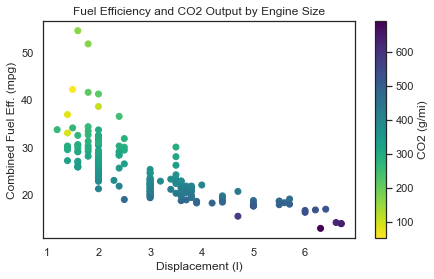

In [124]:
# loading in the data, sampling to reduce points plotted
fuel_econ = pd.read_csv('fuel-econ.csv')

np.random.seed(2018)
sample = np.random.choice(fuel_econ.shape[0], 200, replace = False)
fuel_econ_subset = fuel_econ.loc[sample]

# plotting the data
plt.figure(figsize = [7,4])
plt.scatter(data = fuel_econ_subset, x = 'displ', y = 'comb', c = 'co2',
            cmap = 'viridis_r')
plt.title('Fuel Efficiency and CO2 Output by Engine Size')
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.colorbar(label = 'CO2 (g/mi)');

I created labels to the individual axes, including units of measurement. I also added a descriptive title for the plot. On the x-axis, I've changed the default tick marks to be plain numbers, using a 1-3-10 scheme. Finally, I've added a legend to the plot to associate each point to a Pokemon type. To set up the custom colors, I added a 'palette' argument to the FacetGrid call, pointing to a dictionary associating each type to a color. The legend was added using matplotlib, so that the Pokemon types could be capitalized.


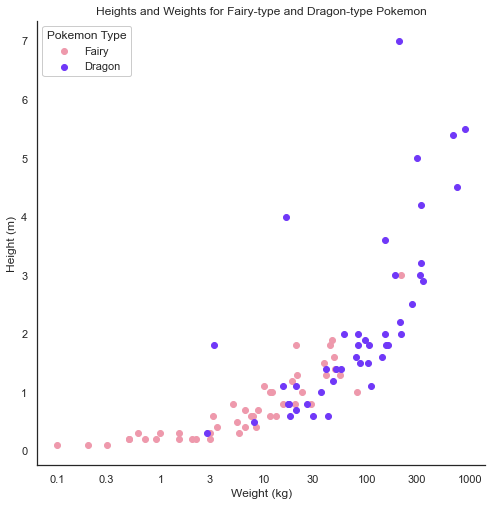

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

sol_string = ["I created labels to the individual axes, including units of",
                  "measurement. I also added a descriptive title for the plot.",
                  "On the x-axis, I've changed the default tick marks to be",
                  "plain numbers, using a 1-3-10 scheme. Finally, I've added a",
                  "legend to the plot to associate each point to a Pokemon type.",
                  "To set up the custom colors, I added a 'palette' argument to",
                  "the FacetGrid call, pointing to a dictionary associating each",
                  "type to a color. The legend was added using matplotlib, so",
                  "that the Pokemon types could be capitalized."]
print((" ").join(sol_string))

# data setup
pokemon = pd.read_csv('pokemon.csv')

type_cols = ['type_1','type_2']
non_type_cols = pokemon.columns.difference(type_cols)
pkmn_types = pokemon.melt(id_vars = non_type_cols, value_vars = type_cols,
                            var_name = 'type_level', value_name = 'type').dropna()
pokemon_sub = pkmn_types.loc[pkmn_types['type'].isin(['fairy','dragon'])]

# set up a dictionary to map types to colors
type_colors = {'fairy': '#ee99ac', 'dragon': '#7038f8'}

# plotting
g = sb.FacetGrid(data = pokemon_sub, hue = 'type', height = 7,
                    palette = type_colors);
g.map(plt.scatter, 'weight','height')
g.set(xscale = 'log') # need to set scaling before customizing ticks
x_ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
g.set(xticks = x_ticks, xticklabels = x_ticks)

# add labels and titles
g.set_xlabels('Weight (kg)')
g.set_ylabels('Height (m)')
plt.title('Heights and Weights for Fairy-type and Dragon-type Pokemon');
plt.legend(['Fairy', 'Dragon'], title = 'Pokemon Type', facecolor='white', framealpha=1);

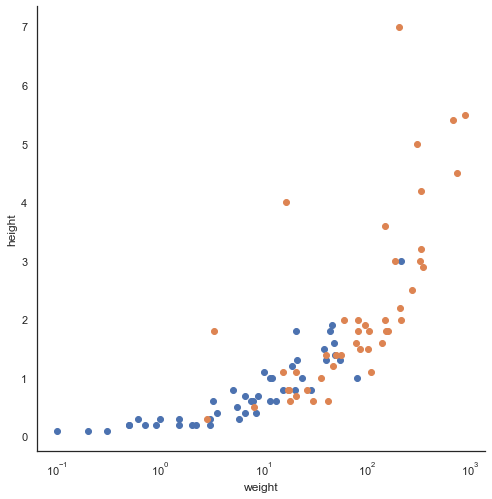

In [143]:
# Original
g = sb.FacetGrid(data = pokemon_sub, hue = 'type', height = 7);
g.map(plt.scatter, 'weight','height')
g.set(xscale = 'log');

#### Getting and Using Feedback

When putting together a report or presentation to communicate results to others, it never hurts to get outside eyes on your work to make sure that your findings are conveyed clearly. Asking colleagues, friends, or family to provide feedback can be a good step to making sure that the story that you wish to tell hits its mark.

When you present your work to the reader, let them go through the work for themselves first. Then, follow up with them to check whether or not their conclusions match what you were hoping to convey. The following questions might be good starters; be sure to follow up or come up with your own questions:

What do you notice about each visualization?
What questions do you have about the data?
What relationships do you notice?
What do you think is the main takeaway from the report / presentation?
Is there anything that you don’t understand from the plots?
Use the feedback that you get from your reader to iterate on and improve on your designs. The alternative perspective that they have may reveal things that you didn't consider or points that require further clarification.